# Projet : Emission de CO2 par les véhicules commercialisés

Gilles Ngamenye, Christophe Seuret, Camille Millon

***

## **Présentation du projet**

### **I. Description**: 
>1. Identifier les véhicules qui émettent le plus de CO2 est important pour identifier les caractéristiques techniques qui jouent un rôle dans la pollution. 
>2. Prédire à l’avance cette pollution permet de prévenir dans le cas de l’apparition de nouveaux types de véhicules (nouvelles séries de voitures par exemple)

### **II. Conditions de validation du projet:**
>
>Chargement et exploration exhaustif des données
>
>Analyse statistique et visualisations.
>
>Machine learning : 
>*   Prédiction du CO2
>*   Interprétabilité du modèle (SHAP)
>*   Demo Streamlit

### **III. Dataset:**
>
>Fichier data2013.csv: Emissions de CO2 et polluants des véhicules commercialisées en France
>
>Pourquoi?: difficultés techniques à travailler sur le dataset européen

### **Plan**

**`1ère partie : Exploration des données`**
   
1. Recueil du dataset
    
2. Observation des variables et premiers traitements
    <br>&emsp;*2.1 Variables quantitatives*
    <br>&emsp;*2.2 Variables qualitatives*
    
    
3. Traitement des valeurs manquantes

    
4. Revue statistique, visualisation 1 (avant sélection des variables)
    <br>&emsp;*4.1 Représentation graphique de la variable CO2*
    <br>&emsp;*4.2 Variables quantitatives*
    <br>&emsp;*4.3 Variables qualitatives*
        
        
5. Sélection des variables utiles

6. Revue statistique, visualisation 2 (après sélection des variables)
    <br>&emsp;*6.1 Représentation graphique de la variable CO2*
    <br>&emsp;*6.2 Variables quantitatives*
    <br>&emsp;*6.3 Variables qualitatives*

**`2e partie : Modélisation`**

1. Regression

2. Classification
    
3. Validation des modèles

**`3e partie : Conclusion`**

***

# **1ère partie : Exploration des données**

***

## 1. Recueil du dataset

Approche des normes euros d'emissions de pollutants pour les véhicules (source : https://www.ecologie.gouv.fr/normes-euros-demissions-polluants-vehicules-lourds-vehicules-propres)



In [2]:
#Chargement des librairies utiles au projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme() # pour modifier le thème

In [6]:
# Emissions de polluants, CO2 et caractéristiques des véhicules
# commercialisés en France en 2013
url = 'https://raw.githubusercontent.com/ChristopheDS22/CO2_Predict/main/data_2013.csv?token=GHSAT0AAAAAAB23YD6Q6THYNAWT5MVRYIBAY3KA3SQ'
df_2013 = df_2013=pd.read_csv(url,encoding='latin-1',sep=';')
df_2013.head()

,Marque,Modèle dossier,Modèle UTAC,Désignation commerciale,CNIT,Type Variante Version (TVV),Carburant,Hybride,Puissance administrative,Puissance maximale (kW),...,HC (g/km),NOX (g/km),HC+NOX (g/km),Particules (g/km),masse vide euro min (kg),masse vide euro max (kg),Champ V9,Date de mise à jour,Carrosserie,gamme
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147.0,...,0.052,0.032,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C,GO,non,9,125.0,...,NaN,0.169,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100.0,...,NaN,0.149,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125.0,...,NaN,0.164,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER


## 2. Observation des variables et premiers traitements

In [7]:
#on renomme les variables pour plus de facilité d'utilisation
variables = {'Modèle dossier' : 'modele_dossier',
             'Modèle UTAC':'modele_UTAC',
             'Désignation commerciale':'design_comm',
             'Type Variante Version (TVV)':'TVV',
             'Puissance administrative':'puissance_adm',
             'Puissance maximale (kW)' : 'puiss_max',
             'Boîte de vitesse':'boite0',
             'Consommation urbaine (l/100km)':'conso_urb',
             'Consommation extra-urbaine (l/100km)':'conso_extra_urb',
             'Consommation mixte (l/100km)':'conso_mixte',
             'CO2 (g/km)':'CO2',
             'CO type I (g/km)':'CO2_type_1',
             'HC (g/km)':'HC',
             'NOX (g/km)':'NOX',
             'HC+NOX (g/km)':'hcnox',
             'Particules (g/km)':'particules',
             'masse vide euro min (kg)': 'masse_ordma_min',
             'masse vide euro max (kg)': 'masse_ordma_max',
             'Champ V9':'champ_V9',
             'Date de mise à jour':'date_maj'
            }


df_2013 = df_2013.rename(variables, axis = 1)

In [8]:
# On checke les doublons
print('Il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset avant traitement')

# et on les supprime
df_2013 = df_2013.drop_duplicates()
print('Maintenant, il y a ', df_2013.duplicated().sum(), 'doublons dans le dataset')

Il y a  619 doublons dans le dataset avant traitement
Maintenant, il y a  0 doublons dans le dataset


On regarde maintenant la table au global, et les variables une par une pour comprendre leur signification

In [7]:
df_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44231 entries, 0 to 44849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marque           44231 non-null  object 
 1   modele_dossier   44231 non-null  object 
 2   modele_UTAC      44231 non-null  object 
 3   design_comm      44231 non-null  object 
 4   CNIT             44231 non-null  object 
 5   TVV              44231 non-null  object 
 6   Carburant        44231 non-null  object 
 7   Hybride          44231 non-null  object 
 8   puissance_adm    44231 non-null  int64  
 9   puiss_max        44231 non-null  float64
 10  boite0           44231 non-null  object 
 11  conso_urb        44189 non-null  float64
 12  conso_extra_urb  44189 non-null  float64
 13  conso_mixte      44192 non-null  float64
 14  CO2              44192 non-null  float64
 15  CO2_type_1       44096 non-null  float64
 16  HC               10050 non-null  float64
 17  NOX         

On voit déjà qu'il y a des valeurs manquantes. Il faut comprendre le sens des variables dans un premier temps pour traiter ces manquants ensuite

### *2.1 Variables quantitatives*
Il y a 13 variables quantitatives :
- puissance adm : puissance administrative en kW
- puiss_max : puissance maximale en kW
- conso_urb : consommation urbaine de carburant (en l/100km),
- conso_extra_urb : consommation extra urbaine de carburant (en l/100km),
- conso_mixte : consommation mixte de carburant (en l/100km),
- CO2 : l'émission de CO2 (en g/km), (ça sera la variable à expliquer)
- CO2_type_1 : le résultat d’essai de CO type I
- HC : les résultats d’essai HC
- NOX : les résultats d’essai NOx
- hcnox : les résultats d’essai HC+NOX
- particules : le résultat d’essai de particules 
- masse_ordma_min : la masse en ordre de marche mini
- masse_ordma_max : la masse en ordre de marche maxi

In [8]:
# Récapitulatif statistique des variables quantitatives
df_2013.describe()

,puissance_adm,puiss_max,conso_urb,conso_extra_urb,conso_mixte,CO2,CO2_type_1,HC,NOX,hcnox,particules,masse_ordma_min,masse_ordma_max
count,44231.000000,44231.000000,44189.000000,44189.000000,44192.000000,44192.000000,44096.000000,10050.000000,44096.000000,34093.000000,41561.000000,44231.000000,44231.000000
mean,11.067803,125.231815,9.697617,6.567715,7.713074,199.352032,0.151736,0.030216,0.314705,0.225175,0.000963,2076.426353,2174.939906
std,5.568019,49.242734,2.321492,1.168886,1.563748,38.369114,0.137573,0.018544,0.464597,0.041107,0.006480,335.292306,402.759649
min,1.000000,10.000000,0.000000,2.800000,1.200000,27.000000,0.005000,0.008000,0.001000,0.038000,0.000000,825.000000,825.000000
25%,9.000000,100.000000,8.800000,6.400000,7.200000,189.000000,0.046000,0.008000,0.162000,0.201000,0.000000,1976.000000,2075.000000
50%,10.000000,120.000000,9.800000,6.700000,7.700000,203.000000,0.093000,0.031000,0.197000,0.220000,0.001000,2076.000000,2185.000000
75%,11.000000,125.000000,10.700000,7.100000,8.400000,221.000000,0.213000,0.044000,0.228000,0.248000,0.001000,2255.000000,2355.000000
max,81.000000,559.300000,41.100000,14.900000,24.500000,572.000000,0.968000,0.143000,1.846000,0.306000,0.610000,3115.000000,3115.000000


Beaucoup de valeurs manquantes pour les variables HC et hcnox. Les ordres de grandeurs sont très larges : il sera nécessaire de procéder à une standardisation des valeurs.

### *2.2 Variables qualitatives*
Il y a 12 variables qualitatives :
- Marque : marque du véhicule
- modele_dossier : modèle
- modèle_UTAC : modèle UTAC (nécessité de comprendre la différence avec modèle dossier)
- designation : designation commerciale
- CNIT : Code National d'identification du type
- TVV : Type Variante Version ou type Mines
- Carburant : type de carburant
- Hybride : information permettant d'identifier les véhicules hybrides
- boite0: type de boîte de vitesse et le nombre de rapports
- champ_V9 : champ V9 du vertificat d'immatriculation qui contient la norme euro
- Carrosserie : Carrosserie
- gamme : gamme

#### *Variable 'Marque'*

In [9]:
# Répartition des voitures par marques
df_2013.Marque.value_counts()

MERCEDES-BENZ                38282
VOLKSWAGEN                     900
BMW                            525
OPEL                           520
FIAT                           415
SKODA                          364
FORD                           296
AUDI                           242
CITROEN                        207
LEXUS                          175
MERCEDES AMG                   174
NISSAN                         173
PEUGEOT                        160
RENAULT                        155
TOYOTA                         111
VOLVO                          106
SEAT                           105
ALFA-ROMEO                     103
PORSCHE                         89
MINI                            79
KIA                             78
ASTON MARTIN                    78
JEEP                            74
CHEVROLET                       63
JAGUAR LAND ROVER LIMITED       55
SMART                           52
HYUNDAI                         52
HONDA                           51
MAZDA               

On constate une sur-représentation de la marque MERCEDES-BENZ dans le dataset

#### *Variables 'Modèle dossier' et 'Modèle UTAC'*

In [9]:
# Les variables modele_dossier et modele_UTAC semblent assez similaires : quelle est la différence?
pd.crosstab(df_2013.modele_dossier,df_2013.modele_UTAC)

test_mod=df_2013[-(df_2013.modele_dossier==df_2013.modele_UTAC)]
pd.crosstab(test_mod.modele_dossier,test_mod.modele_UTAC)

modele_UTAC,114,116,118,120,123,125,130,135,2,3,...,X3,X5,X6,XF,XK,XV,YARIS,Z4,ZAFIRA,ZAGATO
modele_dossier,,,,,,,,,,,,,,,,,,,,,
2171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
370Z ROADSTER,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
911 TURBO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKR COUPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
XKR-S CONVERTIBLE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
XKR-S COUPE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
# Quelle variable de modèle choisir?
test_mod.groupby(['Marque','modele_dossier','modele_UTAC']).size()

Marque        modele_dossier        modele_UTAC
ALFA-ROMEO    AR8C SPIDER           8C SPIDER       2
ASTON MARTIN  DB9 VOLANTE           DB9             4
              RAPIDE S              RAPIDE          2
              V12 VANTAGE           VANTAGE         2
              V12 VANTAGE ROADSTER  VANTAGE         2
                                                   ..
VOLKSWAGEN    CC                    PASSAT CC       8
              GOLF PLUS             GOLF            8
              MULTIVAN STARLINE     MULTIVAN        5
VOLVO         V40 CROSS COUNTRY     V40            11
              V60 HYBRID            V60             1
Length: 277, dtype: int64

Ces deux variables sont redondantes, et ne semblent pas apporter d'informations différentes l'une par rapport à l'autre : on garde arbitrairement modele_dossier

#### *Variables 'designation commerciale', 'CNIT', et 'TVV'*

In [12]:
# On cherche à comprendre le sens des variables. 
df_2013[['Marque','modele_dossier','design_comm','CNIT','TVV']].head()

,Marque,modele_dossier,design_comm,CNIT,TVV
0,ALFA-ROMEO,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C
1,ALFA-ROMEO,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,939AXP1B54C
2,ALFA-ROMEO,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64
3,ALFA-ROMEO,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B
4,ALFA-ROMEO,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66


La désignation commerciale est une version plus fournie que le modèle dossier. Il n'apportera pas à priori d'information supplémentaire dans le dataset.
Le CNIT quant à lui est un autre identificateur du véhicule qui peut être partiellement décodé
Le TVV apporte également des informations sur le véhicule, mais nous ne savons pas décoder ni utiliser ces informations. La variable sera supprimée, faute de pouvoir l'interpréter.

In [10]:
# On créé des nouvelles variables qu'on enrichira des valeurs ci-desous
df_2013.insert(5,'cat','T')
df_2013.insert(6,'mq','T')
df_2013.insert(7,'genre','T')

#la variable CNIT génère beaucoup de doublons, à quoi correspond-t-elle?
#les 3 premiers caractères représentent la catégorie
df_2013.cat=df_2013.CNIT.str[:3]

#les 3 suivants sont la marque
df_2013.mq=df_2013.CNIT.str[3:6]

#les 2 suivants le genre (VP dans la majeure partie des cas)
df_2013.genre=df_2013.CNIT.str[6:8]

df_2013[['cat','mq','genre']].head(10)

,cat,mq,genre
0,M10,ALF,VP
1,M10,ALF,VP
2,M10,ALF,VP
3,M10,ALF,VP
4,M10,ALF,VP
5,M10,ALF,VP
6,M10,ALF,VP
7,M10,ALF,VP
8,M10,ALF,VP
9,M10,ALF,VP


Le CNIT renferme des infos techniques mais 'codées' par les constructeurs. On n'y a pas accès. Nous avons ressorti les données standards du CNIT, celles utilisées par tous les constructeurs suivant les mêmes règles. Ces éléments n'apportent pas d'information supplémentaires (elles sont apportées par d'autres variables) mais pourraient permettre de compléter des données manquantes. On supprimera la variable CNIT qui ne servira pas dans la phase de machine learning.

#### *Variable 'Carburant'*

In [14]:
# Répartition des voitures par carburant
df_2013.Carburant.value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
EL          39
ES/GN       23
GN/ES       23
ES/GP       17
GP/ES       17
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

Il y a une sur-représentation des carburants GO (Gasoil)
Il y a des carburants qui se répètent sous des appellations différentes (ES/GN et GN/ES, ES/GP et GP/ES)

ES = Essence

GO = Gazoil

EH = Essence Hybride Non Rechargeable

EE = Essence Hybride Rechargeable

EL = Electrique

GH = Gazoil Hybride Non Rechargeable

ES/GP = GP/ES = Essence GPL

ES/GN = GN/ES = Essence Gaz Naturel

FE = Superethanol-E85

GN = Gaz Naturel (Vehicule)

GL = Gazoil Hybride Rechargeable

In [11]:
# Harmonisation des nomenclatures de carburants
df_2013['Carburant'] = df_2013['Carburant'].replace(to_replace = ['GN/ES', 'GP/ES'], value = ['ES/GN', 'ES/GP'])

# Nouvelle répartition par carburant
df_2013['Carburant'].value_counts()

GO       37680
ES        6108
EH         199
GN          59
GH          54
ES/GN       46
EL          39
ES/GP       34
FE           8
EE           3
GL           1
Name: Carburant, dtype: int64

#### *Variable Hybride*

In [16]:
# Répartition des véhicules hybrides
df_2013.Hybride.value_counts()

non    43974
oui      257
Name: Hybride, dtype: int64

#### *Variable 'boite0'*

Il s'agit du type de boîte de vitesse et le nombre de rapports

In [12]:
# Il faut éclater la variable boite0 en 2 : type de boîte d'un côté et nombre de rapports de l'autre
# On créé des nouvelles variables qu'on enrichira des valeurs ci-desous

df_2013[['boite', 'rapport']]=df_2013.boite0.str.split(expand=True)
df_2013.head()

,Marque,modele_dossier,modele_UTAC,design_comm,CNIT,cat,mq,genre,TVV,Carburant,...,hcnox,particules,masse_ordma_min,masse_ordma_max,champ_V9,date_maj,Carrosserie,gamme,boite,rapport
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,M10,ALF,VP,939AXN1B52C,ES,...,NaN,0.002,1505,1505,715/2007*692/2008EURO5,juin-13,BREAK,MOY-SUPER,M,6
1,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,M10ALFVP000U221,M10,ALF,VP,939AXP1B54C,GO,...,0.190,0.003,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,M10,ALF,VP,939AXR1B64,GO,...,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,M10,ALF,VP,939AXR1B64B,GO,...,0.175,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,M10,ALF,VP,939AXS1B66,GO,...,0.193,0.001,1565,1565,715/2007*692/2008EURO5,juin-13,BERLINE,MOY-SUPER,M,6


In [18]:
# Répartition des types de boîtes de vitesse
df_2013.boite.value_counts()

A    23556
M    20420
V      180
D       71
N        3
S        1
Name: boite, dtype: int64

Cette variable indique la nature de la boîte de vitesse.

A : Automatique / 
M : Manuelle

Toutes les valeurs ne sont pas interprétables

In [13]:
# Regroupement des modalités en sous-nombres sous la valeur "Autres"
df_2013['boite'].replace(to_replace = ['V', 'D', 'N', 'S'], value = 'Autres', inplace = True)
# La modalité D semble être automatique
# Il faudrait retirer les voitures électriques du lot

In [20]:
df_2013.boite.value_counts()

A         23556
M         20420
Autres      255
Name: boite, dtype: int64

In [21]:
# Répartition des nombres de rapports de vitesse
df_2013.rapport.value_counts()

6    20260
5    14832
7     8461
8      446
0      191
4       39
1        2
Name: rapport, dtype: int64

#### *Variable 'Champ V9'*

La variable Champ V9 correspond à un champ de la carte grise qui procure différentes informations comme la date de commercialisation, ou la norme euros

In [22]:
df_2013.champ_V9.value_counts()

715/2007*692/2008EURO5    26220
715/2007*566/2011EURO5     8164
715/2007*630/2012EURO5     3271
2005/55*2008/74EURO5       1876
2005/55*2008/74EEV         1830
715/2007*630/2012EURO6     1148
715/2007*459/2012EURO5     1089
715/2007*459/2012EURO6      339
715/2007*566/2011EURO6      136
715/2007*692/2008EURO6       86
715/2007*566/2011EURO         2
715/2007*459/2012EUR          2
715/2007*459/2012EURO         1
Name: champ_V9, dtype: int64

In [14]:
# Exploitation de la variable Champ V9 : permet de ressortir la norme EURO
df_2013['champ_V9'].replace(to_replace = [np.nan], value = [df_2013['champ_V9'].mode()], inplace = True) # Remplacement des valeurs manquantes par le mode
df_2013['norme_EURO'] = df_2013['champ_V9'].apply(lambda x: x[-5:])
df_2013['norme_EURO'].head()

0    EURO5
1    EURO5
2    EURO5
3    EURO5
4    EURO5
Name: norme_EURO, dtype: object

#### *Variable 'Carrosserie'*

In [24]:
df_2013.Carrosserie.value_counts()

MINIBUS                32576
BERLINE                 4762
BREAK                   2229
TS TERRAINS/CHEMINS     1176
COUPE                   1104
COMBISPACE               901
CABRIOLET                611
MONOSPACE COMPACT        610
MINISPACE                147
MONOSPACE                115
Name: Carrosserie, dtype: int64

#### *Variable 'Gamme du véhicule'*

In [25]:
# Répartition des différentes gammes de véhicules
df_2013.gamme.value_counts()

MOY-INFER     20169
MOY-SUPER     15040
LUXE           5223
SUPERIEURE     1956
INFERIEURE     1622
ECONOMIQUE      219
MOY-INF           2
Name: gamme, dtype: int64

In [15]:
# On modifie les labels qui ne ne sont pas corrects et on les harmonise
def change_gamme(x):
    if x in ['MOY-INFERIEURE','MOY-INFER','MOY-INF']:
        return('MOY-INFERIEURE')
    if x in ['MOY-SUPER']:
        return('MOY-SUPERIEURE')
    else : return(x)


df_2013['gamme2']=df_2013.gamme.apply(change_gamme)

df_2013.gamme2.value_counts()

MOY-INFERIEURE    20171
MOY-SUPERIEURE    15040
LUXE               5223
SUPERIEURE         1956
INFERIEURE         1622
ECONOMIQUE          219
Name: gamme2, dtype: int64

## 3. Traitement des valeurs manquantes

In [27]:
# Détection des valeurs manquantes
print('Répartition des valeurs manquantes par variables')
display(df_2013.isna().sum())

Répartition des valeurs manquantes par variables


Marque                 0
modele_dossier         0
modele_UTAC            0
design_comm            0
CNIT                   0
cat                    0
mq                     0
genre                  0
TVV                    0
Carburant              0
Hybride                0
puissance_adm          0
puiss_max              0
boite0                 0
conso_urb             42
conso_extra_urb       42
conso_mixte           39
CO2                   39
CO2_type_1           135
HC                 34181
NOX                  135
hcnox              10138
particules          2670
masse_ordma_min        0
masse_ordma_max        0
champ_V9               0
date_maj               0
Carrosserie            0
gamme                  0
boite                  0
rapport                0
norme_EURO             0
gamme2                 0
dtype: int64

#### *Quelle stratégie pour les autres valeurs manquantes?*

In [16]:
# Détection des valeurs manquantes dans CO2:
print(df_2013.CO2.isna().sum(),'valeurs manquantes CO2 dans le dataset')

# Détection des valeurs manquantes des véhicules électriques:
print(df_2013[df_2013.Carburant=='EL'].isna().sum(),'valeurs manquantes CO2 pour les véhicules électriques')
print('Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques')

39 valeurs manquantes CO2 dans le dataset
Marque              0
modele_dossier      0
modele_UTAC         0
design_comm         0
CNIT                0
cat                 0
mq                  0
genre               0
TVV                 0
Carburant           0
Hybride             0
puissance_adm       0
puiss_max           0
boite0              0
conso_urb          39
conso_extra_urb    39
conso_mixte        39
CO2                39
CO2_type_1         39
HC                 39
NOX                39
hcnox              39
particules         39
masse_ordma_min     0
masse_ordma_max     0
champ_V9            0
date_maj            0
Carrosserie         0
gamme               0
boite               0
rapport             0
norme_EURO          0
gamme2              0
dtype: int64 valeurs manquantes CO2 pour les véhicules électriques
Les 39 valeurs manquantes de la colonne CO2 du dataset correspondent aux 39 véhicules électriques


In [17]:
# Remplacement de ces valeurs manquantes des 'EL' par 0:
df_2013['CO2'] = df_2013['CO2'].fillna(0)

# Vérification du bon remplacement:
df_2013['CO2'].isna().sum()

0

In [18]:
# Les valeurs manquantes de consommation semblent coller avec celles des véhicules électriques
df_2013['conso_urb'] = df_2013['conso_urb'].fillna(0)
df_2013['conso_extra_urb'] = df_2013['conso_extra_urb'].fillna(0)
df_2013['conso_mixte'] = df_2013['conso_mixte'].fillna(0)

# Les valeurs manquantes des variables NOX, hcnox et particules sont remplacées par des moyennes
df_2013['NOX'] = df_2013['NOX'].fillna(df_2013['NOX'].mean())
df_2013['hcnox'] = df_2013['hcnox'].fillna(df_2013['hcnox'].mean())
df_2013['particules'] = df_2013['particules'].fillna(df_2013['particules'].mean())
df_2013['CO2_type_1'] = df_2013['CO2_type_1'].fillna(df_2013['CO2_type_1'].mean())

# La variable HC a près de 77% de valeurs manquantes. Elle ne sera pas retenue.
df_2013 = df_2013.drop(['HC'], axis = 1)

# On vérifie le remplacement des valeurs manquantes des variables numériques
df_2013.isna().sum()

Marque             0
modele_dossier     0
modele_UTAC        0
design_comm        0
CNIT               0
cat                0
mq                 0
genre              0
TVV                0
Carburant          0
Hybride            0
puissance_adm      0
puiss_max          0
boite0             0
conso_urb          0
conso_extra_urb    0
conso_mixte        0
CO2                0
CO2_type_1         0
NOX                0
hcnox              0
particules         0
masse_ordma_min    0
masse_ordma_max    0
champ_V9           0
date_maj           0
Carrosserie        0
gamme              0
boite              0
rapport            0
norme_EURO         0
gamme2             0
dtype: int64

#### *Création d'une variable cat_CO2 pour la classification des véhicules*

In [19]:
label = pd.cut(df_2013.CO2,
          bins = [-1,100,120,140,160,200,249,600],
          labels = ['A','B','C','D','E', 'F','G'])

df_2013['Cat_CO2'] = label 

## 4. Revue statistique - Data visualisation 1  (avant sélection des variables)

### *4.1 Représentation graphique de l'indicateur CO2*

C:\Users\s028171\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


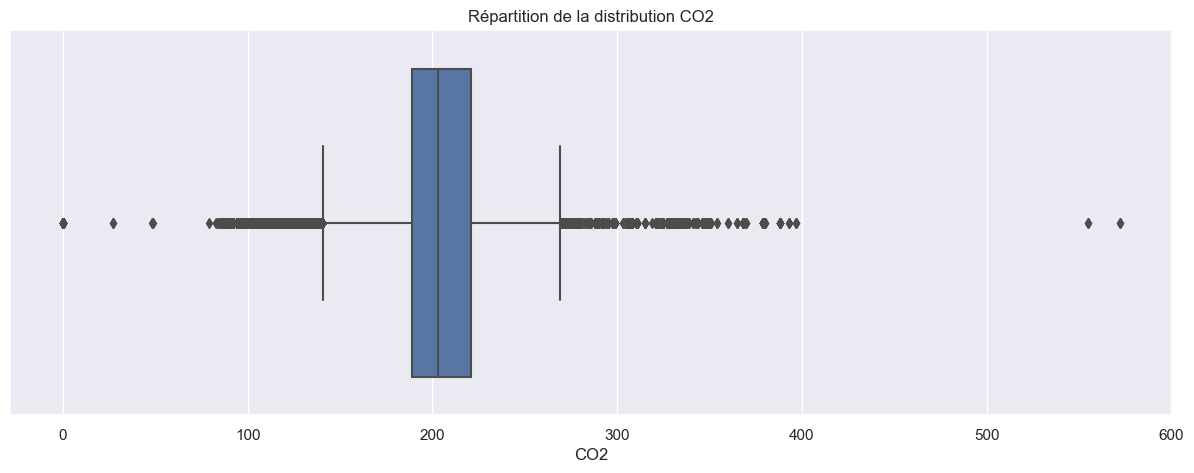

In [20]:
# Répartition de la distribution CO2:
plt.figure(figsize = (15, 5))
sns.boxplot(df_2013['CO2'])
plt.title('Répartition de la distribution CO2');

50% de la distribution est proche de 200 g/km. 
Peu de données pour des valeurs de CO2 inférieures à 189 g/km et supérieures à 221 g/km. 
La distribution est très étendue allant de 0 à 600 g/km

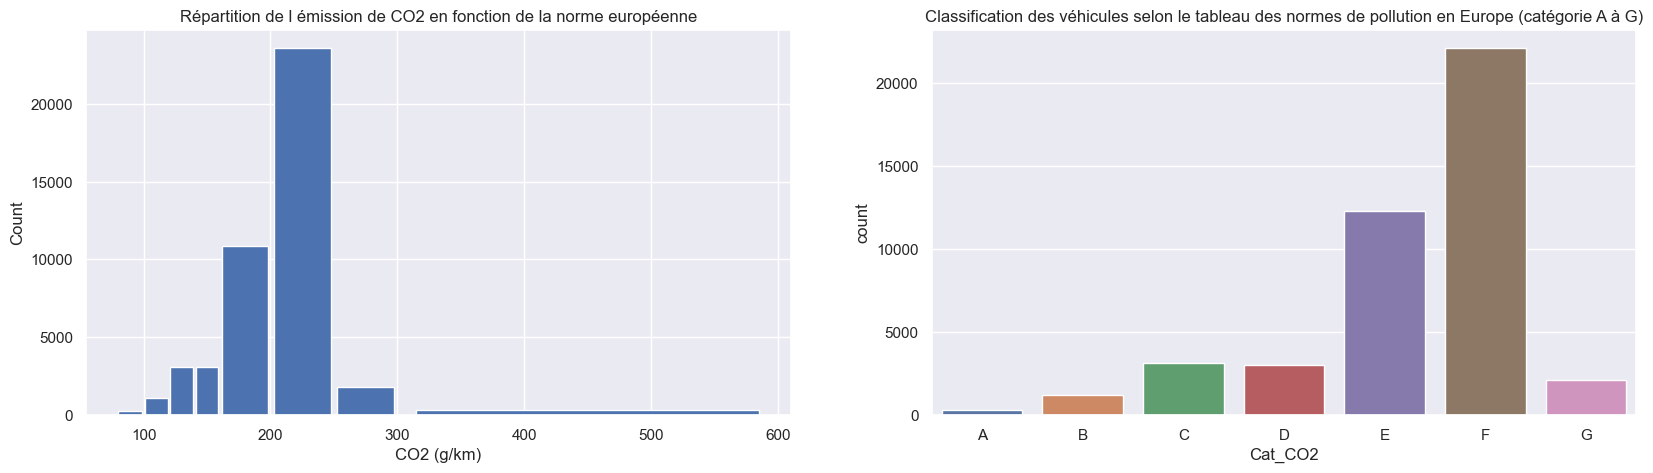

In [33]:
plt.figure(figsize = (20, 5))

# Histogramme représentant la répartition de l'émission de CO2 des véhicules selon la norme européenne:

plt.subplot(121)
plt.hist(df_2013['CO2'], bins = [79,100,120,140,160,200,250,300,600], rwidth = 0.9)
plt.xlabel('CO2 (g/km)')
plt.ylabel('Count')
plt.title('Répartition de l émission de CO2 en fonction de la norme européenne');

# Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G):

plt.subplot(122)
sns.countplot(data = df_2013, x = 'Cat_CO2', order = ('A','B','C','D','E','F','G'))
plt.title('Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G)');



In [33]:
df_2013.Cat_CO2.value_counts()

F    22090
E    12285
C     3142
D     3038
G     2136
B     1218
A      322
Name: Cat_CO2, dtype: int64

### 4.2 *Analyse des variables quantitatives*

#### *Heatmap*

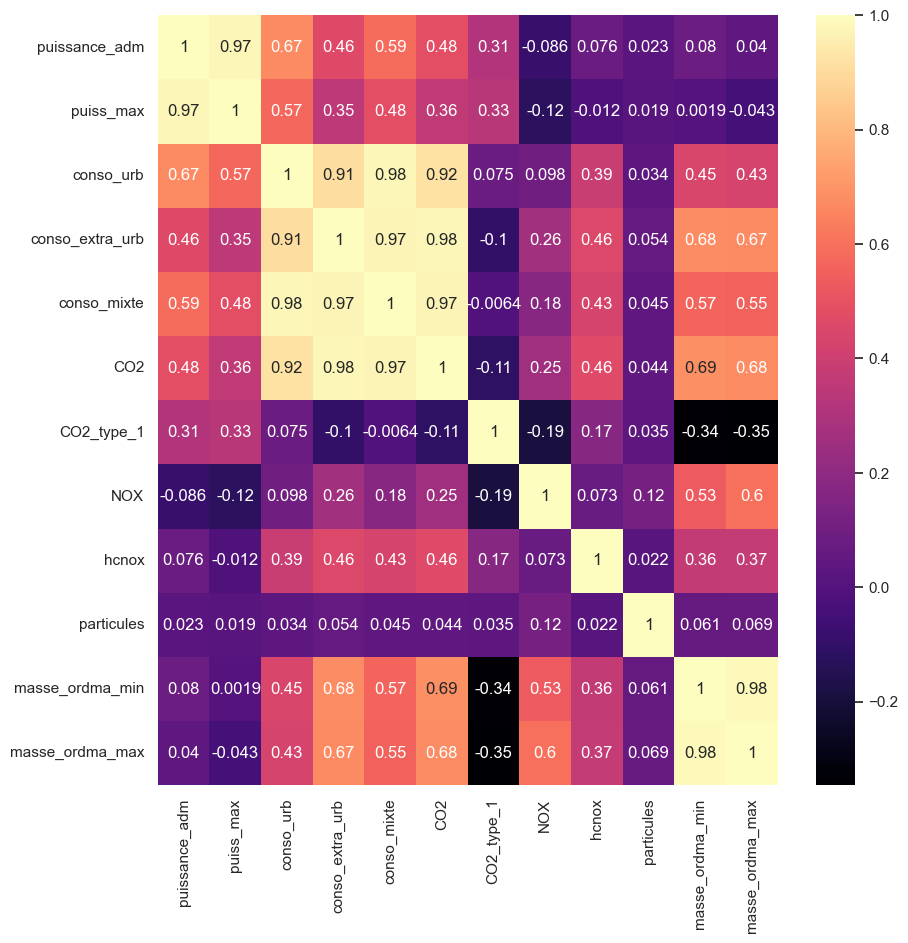

In [34]:
# Corrélation entre les variables : affichage de la heatmap
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_2013.corr(), annot = True, ax = ax, cmap = 'magma');

La Heatmap montre que les masses en ordre de marche et la consommation des véhicules sont très corrélées avec les niveaux d'emission en CO2.

On va tenter de visualiser cela.

Par contre, les variables NOX, hcnox et particules sont des émissions au même titre que le CO2. Elles ne seront pas conservées comme variables explicatives. 

#### *Lien entre les masses des véhicules et leurs niveaux d'émission de CO2*

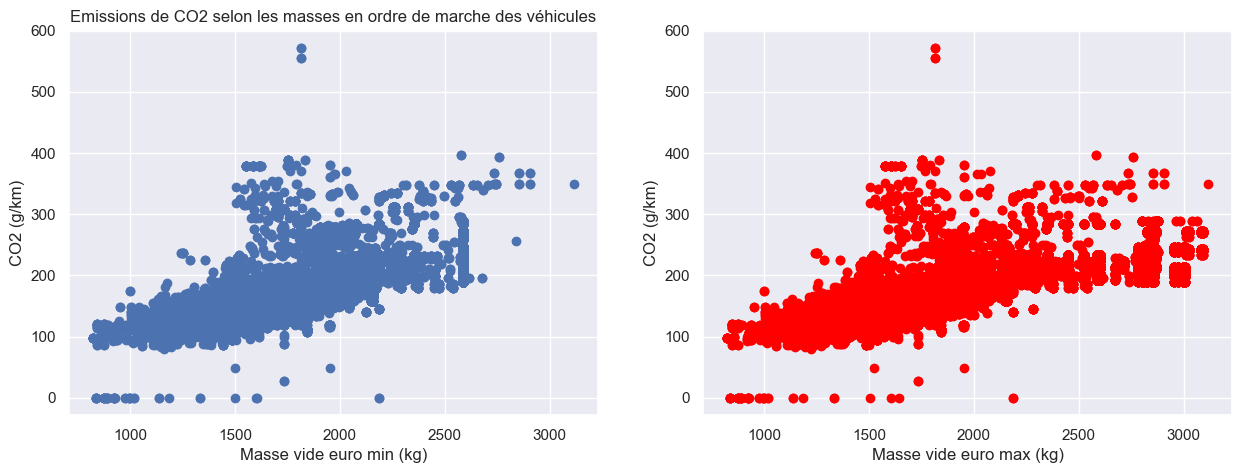

In [35]:
# Graphique montrant le lien entre les masses des véhicules et leurs niveaux d'émission de CO2
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_2013['masse_ordma_min'], df_2013['CO2'])
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro min (kg)')
plt.title('Emissions de CO2 selon les masses en ordre de marche des véhicules')

plt.subplot(1, 2, 2)
plt.scatter(df_2013['masse_ordma_max'], df_2013['CO2'], color= 'red')
plt.ylabel('CO2 (g/km)')
plt.xlabel('Masse vide euro max (kg)');

Les 2 graphiques sont très similaires. Donc on peut déjà voir qu'il y a une colinéarité entre ces 2 variables.

#### *Lien entre la consommation des véhicules et leurs niveaux d'émission de CO2*

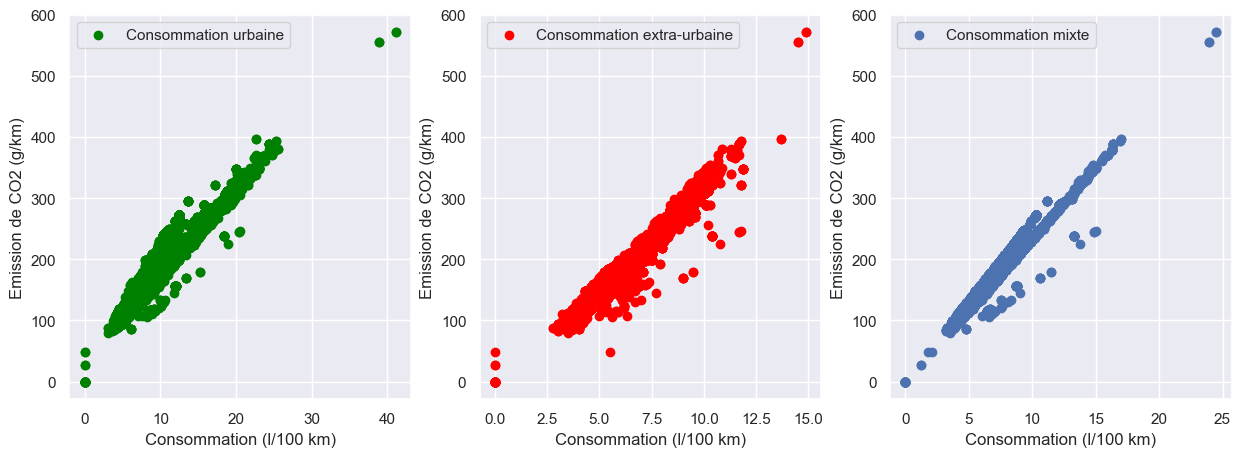

In [36]:
# Relation entre les consommations et les émissions en CO2
plt.figure(figsize = (15, 5))
plt.title('Relation entre les consommations et les émissions en CO2')
plt.subplot(1, 3, 1)
plt.scatter(df_2013['conso_urb'], df_2013['CO2'], label = 'Consommation urbaine', color = 'green')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(df_2013['conso_extra_urb'], df_2013['CO2'], label = 'Consommation extra-urbaine', color = 'red')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_2013['conso_mixte'], df_2013['CO2'], label = 'Consommation mixte')
plt.xlabel('Consommation (l/100 km)')
plt.ylabel('Emission de CO2 (g/km)')
plt.legend();

Les graphes montrent une corrélation quasi-linéaire entre la consommation des véhicules et leurs niveaux d'émission en CO2. Ceci illustre une colinéarité entre les variables de consommation et les émissions en CO2. La consommation du véhicule est une donnée dépendante et ne sera donc pas retenue comme variable explicative.

### 4.3 *Analyse des variables qualitatives*

#### *Marque et modèles*

In [37]:
# Nombre de marques différentes
print('Il y a', df_2013.Marque.value_counts().size, 'marques différentes')

Il y a 51 marques différentes


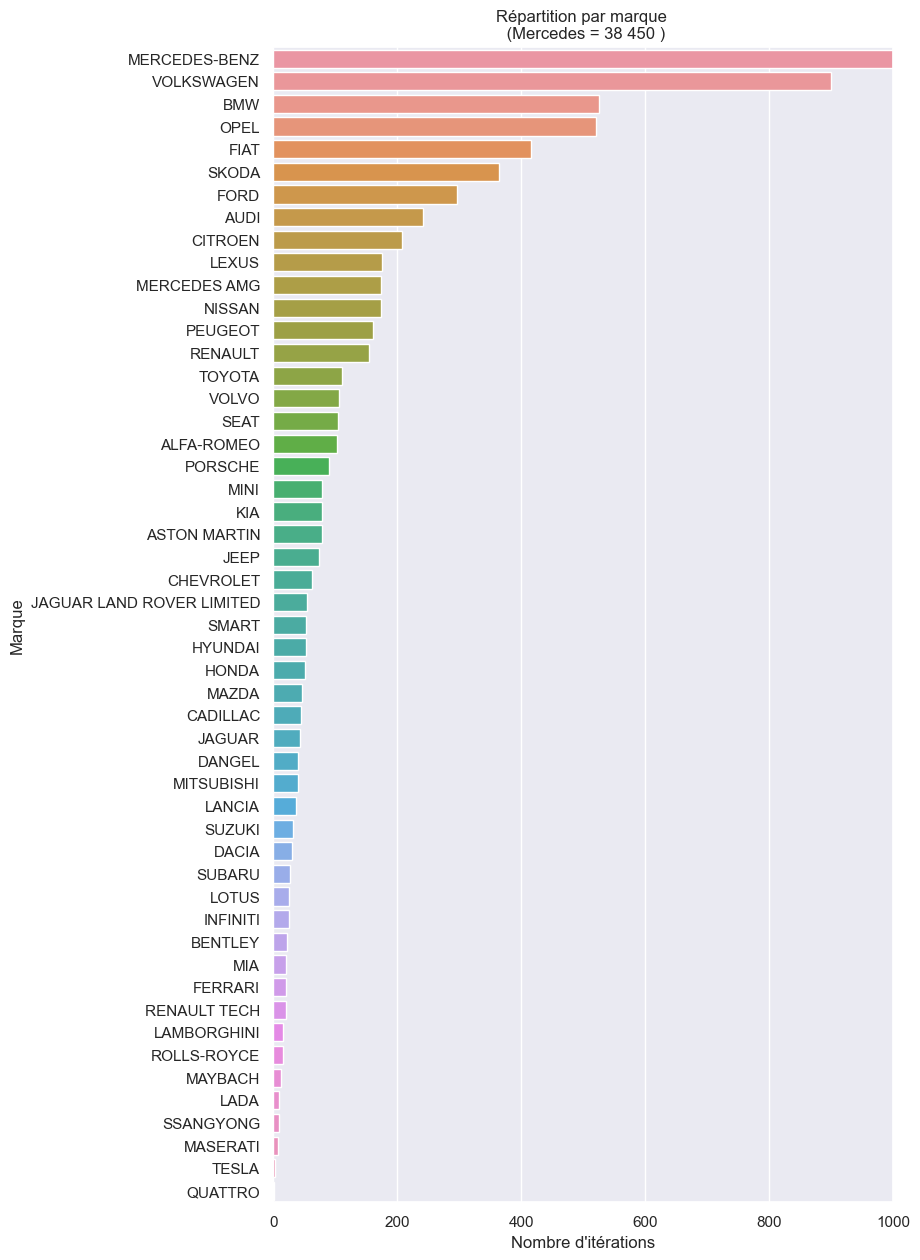

In [38]:
# Répartition des marques
ax = plt.subplots(figsize=(8,15))
plot=sns.countplot(y='Marque',data=df_2013, order = df_2013.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque \n (Mercedes = 38 450 )')
plot.set(xlim=(0, 1000));

Répartition par modèle sur Mercedes pour comprendre la sur-représentation de la marque

In [39]:
# Nombre de modèles différents
df_2013.modele_dossier.value_counts().size

458

In [31]:
def graph_mod(marque_vehicule):
    table=df_2013[df_2013['Marque']==marque_vehicule]
    ax = plt.subplots(figsize=(12,8))
    plot=sns.countplot(y='modele_dossier',data=table,order = table.modele_dossier.value_counts().index)
    plot.set_xlabel("Nombre d'itérations")
    plot.set(title=marque_vehicule);    

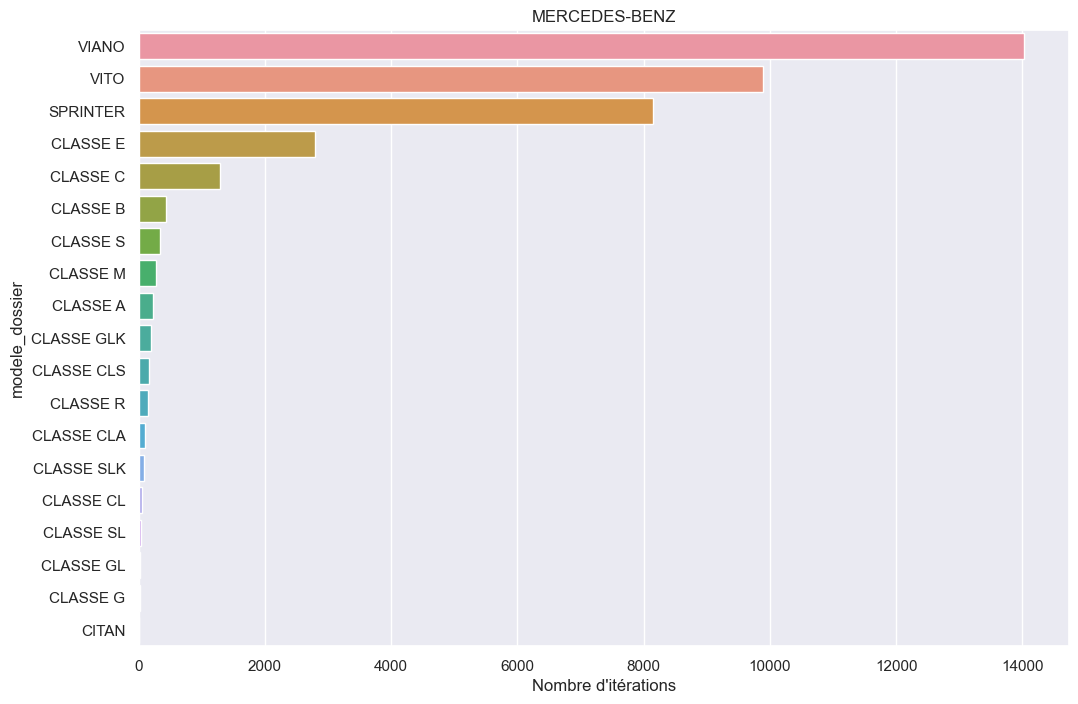

In [41]:
graph_mod('MERCEDES-BENZ')

In [42]:
import statsmodels.api

#ANOVA marques
result = statsmodels.formula.api.ols('CO2 ~ Marque', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table
#il existe un lien significatif entre la variable CO2 et la marque

,df,sum_sq,mean_sq,F,PR(>F)
Marque,50.0,1.935608e+07,387121.640940,361.969283,0.0
Residual,44180.0,4.724996e+07,1069.487548,NaN,NaN


In [43]:
#ANOVA modèles
result = statsmodels.formula.api.ols('CO2 ~ modele_dossier', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table
#il existe un lien significatif entre la variable CO2 et le modèle

,df,sum_sq,mean_sq,F,PR(>F)
modele_dossier,457.0,4.650650e+07,101764.780473,221.624492,0.0
Residual,43773.0,2.009954e+07,459.176598,NaN,NaN


#### *Hybrides*

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


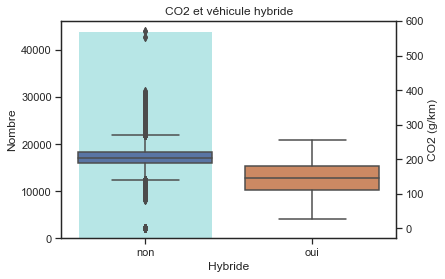

In [44]:
# Répartition des véhiculues hybrides et estimation du lien avec les émissions de CO2
sns.set_style("ticks")


fig, ax = plt.subplots()

sns.countplot(df_2013.Hybride,color='paleturquoise',ax=ax)
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='Hybride',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et véhicule hybride')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [45]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Hybride', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Hybride,1.0,7.989100e+05,798910.012333,536.947743,4.406986e-118
Residual,44229.0,6.580713e+07,1487.872932,NaN,NaN


In [46]:
print('Pourcentage de véhicules non-hybride dans le dataset =',
      round(df_2013.Carburant[(df_2013['Hybride']=='non')].count()/df_2013.Hybride.count()*100,2),'%')

Pourcentage de véhicules non-hybride dans le dataset = 99.42 %


Les véhicules non-hybrides représentent 98% de tous les véhicules du dataset. Les véhicules hybrides ne sont pas suffisamment représentés

In [47]:
# Suppression de la variable hybride
df_2013 = df_2013.drop('Hybride', axis = 1)

#### *Gamme de véhicule (supérieure, luxe, inférieure, économique)*

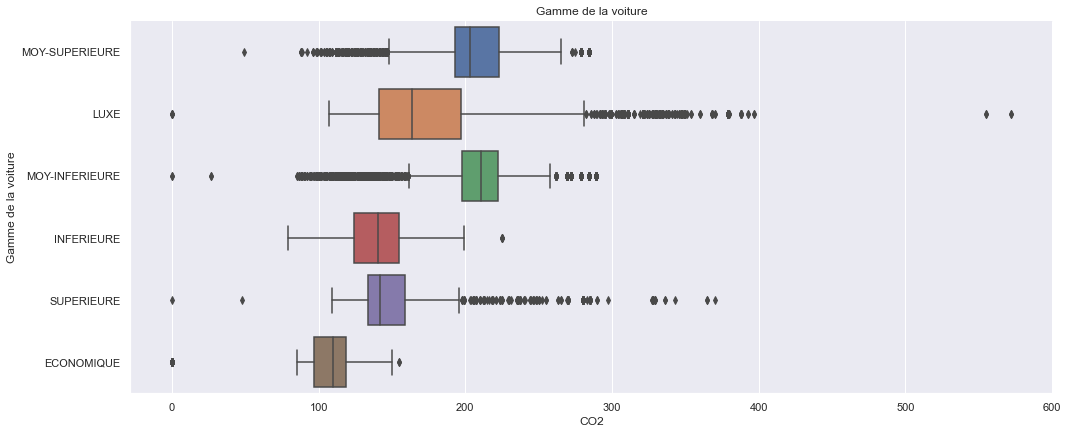

In [48]:
# Répartition des types de gammes de véhicules selon les niveaux d'émission de CO2
plot2=sns.catplot(y='gamme2',x='CO2',kind='box',data=df_2013, height=6, aspect=15/6);
plot2.set(title='Gamme de la voiture')
plot2.set(ylabel='Gamme de la voiture');

In [49]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ gamme2', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
gamme2,5.0,1.674288e+07,3.348575e+06,2969.942763,0.0
Residual,44225.0,4.986317e+07,1.127488e+03,NaN,NaN


#### *Carburant*

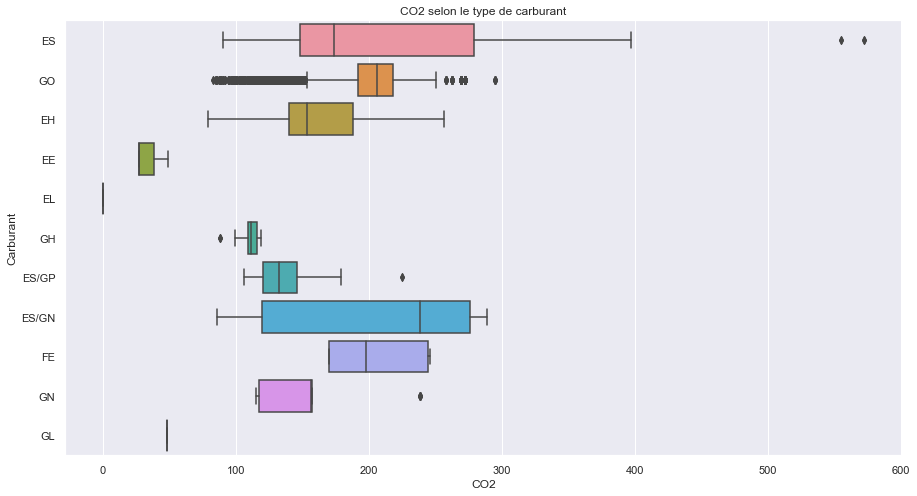

In [50]:
# Répartition entre les types de carburants selon leurs émissions de CO2
plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carburant',x='CO2',data=df_2013)
ax.set(title='CO2 selon le type de carburant');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [51]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carburant', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Carburant,10.0,2.734602e+06,273460.231833,189.324235,0.0
Residual,44220.0,6.387144e+07,1444.401619,NaN,NaN


In [52]:
# Pourcentage de véhicules essence et diesel dans le dataset:
print('Pourcentage de véhicules essence et diesel dans le dataset =',
      round(((df_2013.Carburant[(df_2013['Carburant']=='ES')].count()) + (df_2013.Carburant[(df_2013['Carburant']=='GO')].count()))/df_2013.Carburant.count()*100,2),
     '%')

Pourcentage de véhicules essence et diesel dans le dataset = 99.0 %


In [53]:
# Les véhicules ES et GO représentent 97,87% de tous les véhicules du dataset:
# ==> on ne garde que les carburants ES et GO, les autres carburants n'étant pas suffisamment représentés:
df_2013 = df_2013[(df_2013['Carburant']=='ES') | (df_2013['Carburant']=='GO')]

#### *Carrosserie*

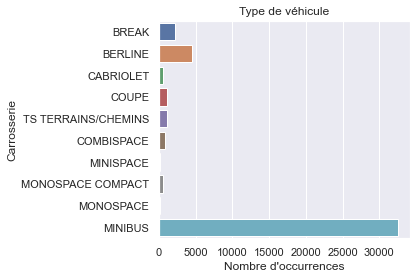

In [54]:
# Répartition des types de carrosserie

plot_car2=sns.countplot(y=df_2013.Carrosserie)
plot_car2.set_xlabel("Nombre d'occurrences")
plot_car2.set_ylabel('Carrosserie')
plot_car2.set(title='Type de véhicule');

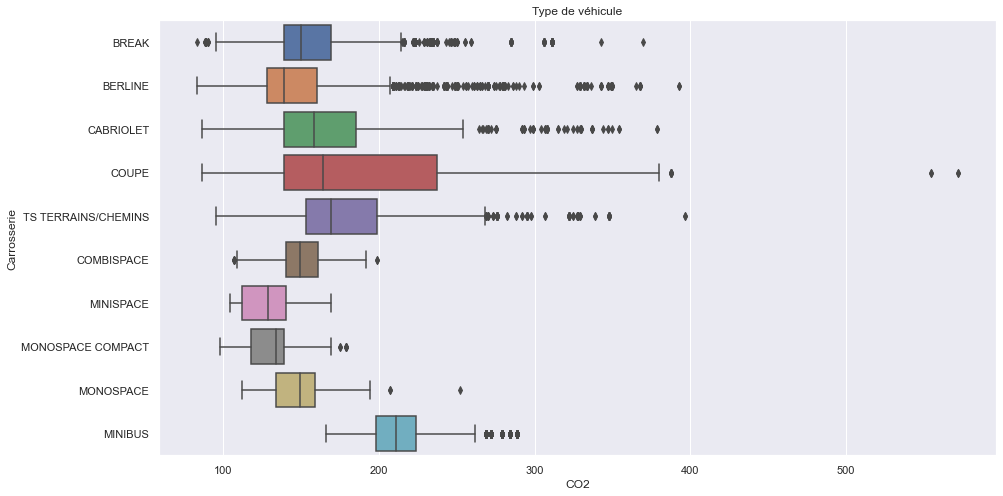

In [55]:
# Lien entre les types de carrosserie et les émissions de CO2
plt.figure(figsize = (15,8))
ax = sns.boxplot(y='Carrosserie',x='CO2',data=df_2013)
ax.set(title='Type de véhicule');
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 30);

In [56]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ Carrosserie', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Carrosserie,9.0,2.762344e+07,3.069271e+06,3774.327452,0.0
Residual,43778.0,3.560013e+07,8.131968e+02,NaN,NaN


#### *Boîte*

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


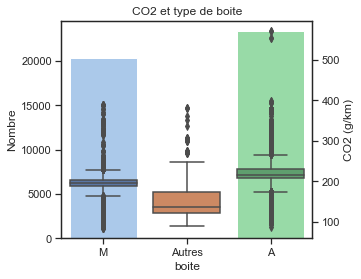

In [57]:
# Répartition des types de boîtes de vitesse selon les émissions de CO2

sns.set_style("ticks")

fig, ax = plt.subplots()

sns.countplot(df_2013.boite,ax=ax,palette='pastel')
ax.set(ylabel='Nombre')
ax2 = ax.twinx()
sns.boxplot(x='boite',y='CO2',data=df_2013,ax=ax2)
ax.set(title='CO2 et type de boite')
ax2.set(ylabel='CO2 (g/km)')
sns.set(rc={'figure.figsize':(4.5,4)})
plt.show();

In [58]:
#ANOVA
result = statsmodels.formula.api.ols('CO2 ~ boite', data = df_2013).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
boite,2.0,7.179128e+06,3.589564e+06,2804.364812,0.0
Residual,43785.0,5.604444e+07,1.279992e+03,NaN,NaN


#### *Norme EURO*

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


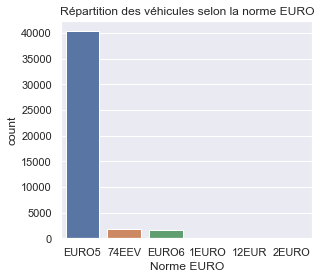

In [59]:
plot_norme=sns.countplot(df_2013['norme_EURO'], order = df_2013['norme_EURO'].value_counts().index)
plot_norme.set_xlabel("Norme EURO")
plot_norme.set(title='Répartition des véhicules selon la norme EURO');
# Il y a une sur-représentation de véhicules avec la norme EURO5

## 5. Sélection des variables utiles

In [21]:
# On ne conserve que les variables qui vont être utiles pour la modélisation
# Les variables corrélées entre-elles sont aussi délaissées

df = df_2013.drop(columns = ['modele_UTAC', 'modele_dossier', 'design_comm', 'CNIT', "TVV", 'puissance_adm', 
                              'boite0', 'conso_urb', 'conso_extra_urb', 'conso_mixte', 'CO2_type_1', 'NOX', 'hcnox', 'norme_EURO',
                              'particules','masse_ordma_max', 'champ_V9', 'date_maj','gamme', 'rapport','cat', 'mq', 'genre'])

In [22]:
# On revérifie les doublons avec cette nouvelle base
# On checke les doublons
print('Il y a', df.duplicated().sum(), 'doublons dans le dataset avant traitement')

# et on les supprime
df = df.drop_duplicates()
print('Maintenant, il y a', df.duplicated().sum(), 'doublons dans le dataset')

Il y a 38995 doublons dans le dataset avant traitement
Maintenant, il y a 0 doublons dans le dataset


In [23]:
print("La taille de la base originale était de ",df_2013.shape,' elle est désormais de ',df.shape)

La taille de la base originale était de  (44231, 33)  elle est désormais de  (5236, 10)


La suppression de certaines variables a généré un nombre très important de doublons, la taille de la base est largement réduite maintenant, mais les données supprimées étaient redondantes

In [49]:
df.head()

,Marque,Carburant,Hybride,puiss_max,CO2,masse_ordma_min,Carrosserie,boite,gamme2,Cat_CO2
0,ALFA-ROMEO,ES,non,147.0,182.0,1505,BREAK,M,MOY-SUPERIEURE,E
1,ALFA-ROMEO,GO,non,125.0,136.0,1565,BERLINE,M,MOY-SUPERIEURE,C
2,ALFA-ROMEO,GO,non,100.0,134.0,1565,BERLINE,M,MOY-SUPERIEURE,C
4,ALFA-ROMEO,GO,non,125.0,139.0,1565,BERLINE,M,MOY-SUPERIEURE,C
6,ALFA-ROMEO,ES,non,147.0,186.0,1555,BREAK,M,MOY-SUPERIEURE,E


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5117 entries, 0 to 44849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Marque           5117 non-null   object  
 1   modele_dossier   5117 non-null   object  
 2   Carburant        5117 non-null   object  
 3   puiss_max        5117 non-null   float64 
 4   CO2              5117 non-null   float64 
 5   masse_ordma_min  5117 non-null   int64   
 6   Carrosserie      5117 non-null   object  
 7   boite            5117 non-null   object  
 8   gamme2           5117 non-null   object  
 9   Cat_CO2          5117 non-null   category
dtypes: category(1), float64(2), int64(1), object(6)
memory usage: 405.1+ KB


In [65]:
df.describe()

,puiss_max,CO2,masse_ordma_min
count,5117.000000,5117.000000,5117.000000
mean,136.876920,166.136213,1674.891343
std,80.304727,50.965544,357.736483
min,40.000000,83.000000,825.000000
25%,85.000000,132.000000,1444.000000
50%,114.000000,154.000000,1615.000000
75%,150.000000,192.000000,1935.000000
max,559.300000,572.000000,3115.000000


## 6. Revue statistique - Data visualisation 2 (après sélection des variables)

### *6.1 Représentation graphique de l'indicateur CO2*

C:\Users\s028171\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


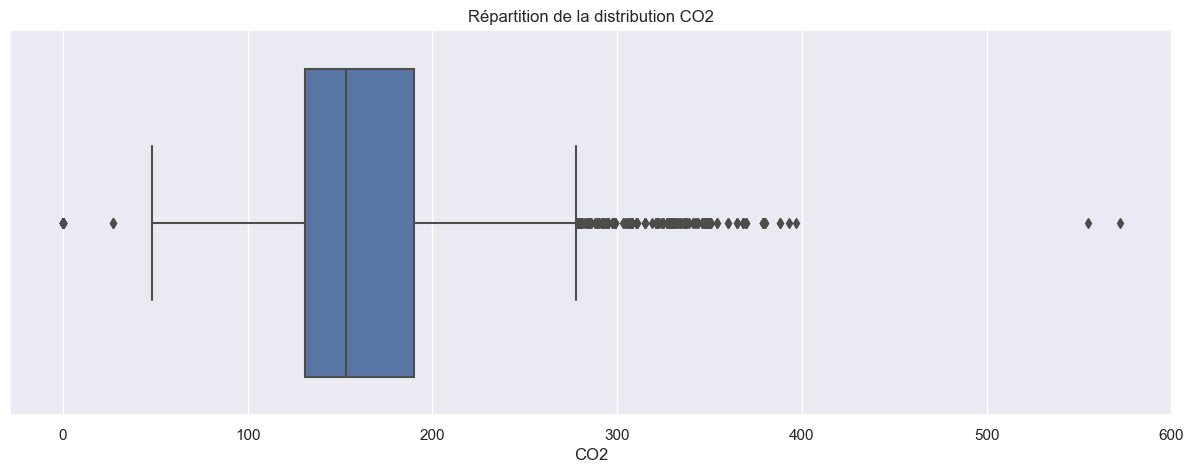

In [50]:
# Répartition de la distribution CO2:
plt.figure(figsize = (15, 5))
sns.boxplot(df['CO2'])
plt.title('Répartition de la distribution CO2');

La variable CO2 fortement impactée par le choix des variables et le dédoublonnage, le CO2 médian a diminué de 50 g/ km

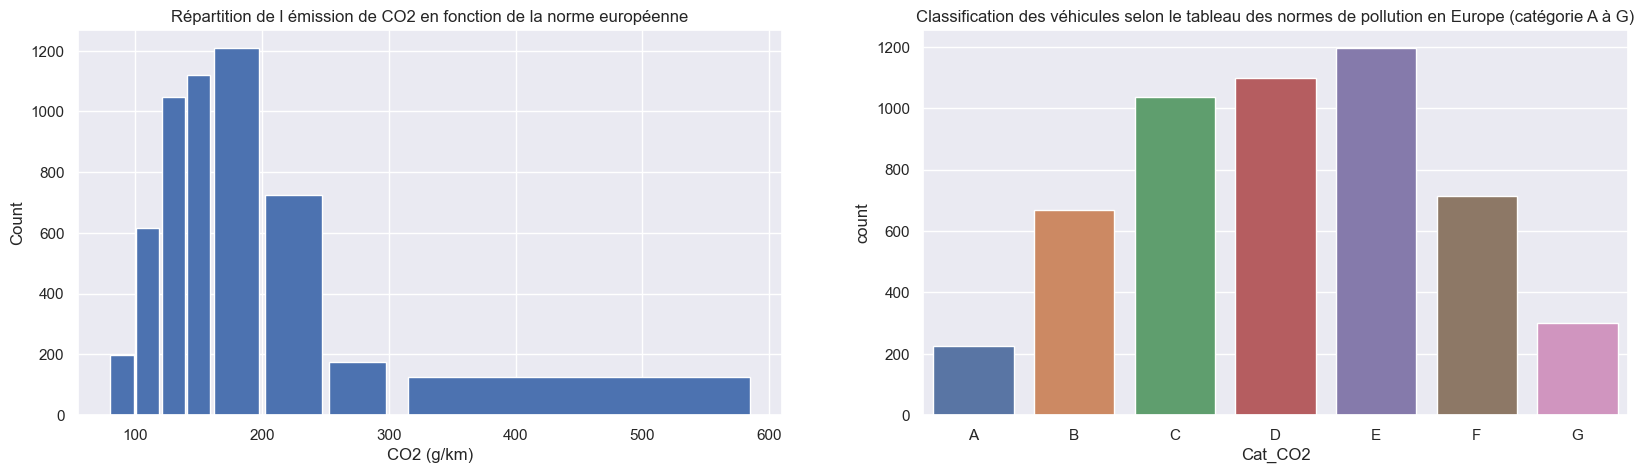

In [51]:
plt.figure(figsize = (20, 5))

# Histogramme représentant la répartition de l'émission de CO2 des véhicules selon la norme européenne:

plt.subplot(121)
plt.hist(df['CO2'], bins = [79,100,120,140,160,200,250,300,600], rwidth = 0.9)
plt.xlabel('CO2 (g/km)')
plt.ylabel('Count')
plt.title('Répartition de l émission de CO2 en fonction de la norme européenne');

# Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G):

plt.subplot(122)
sns.countplot(data = df, x = 'Cat_CO2', order = ('A','B','C','D','E','F','G'))
plt.title('Classification des véhicules selon le tableau des normes de pollution en Europe (catégorie A à G)');



On constate une répartition plus homogène selon les catégories de CO2

### 6.2 *Analyse des variables quantitatives*

#### *Heatmap*

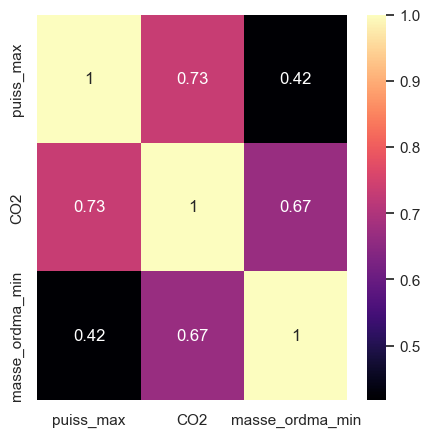

In [54]:
# Corrélation entre les variables : affichage de la heatmap
fig, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(df.corr(), annot = True, ax = ax, cmap = 'magma');

### 4.3 *Analyse des variables qualitatives*

#### *Marque et modèles*

In [24]:
# Nombre de marques différentes
print('Il y a', df.Marque.value_counts().size, 'marques différentes')

Il y a 51 marques différentes


Aucune marque n'a disparu, ce qui est rassurant : nous avons seulement supprimé les doublons

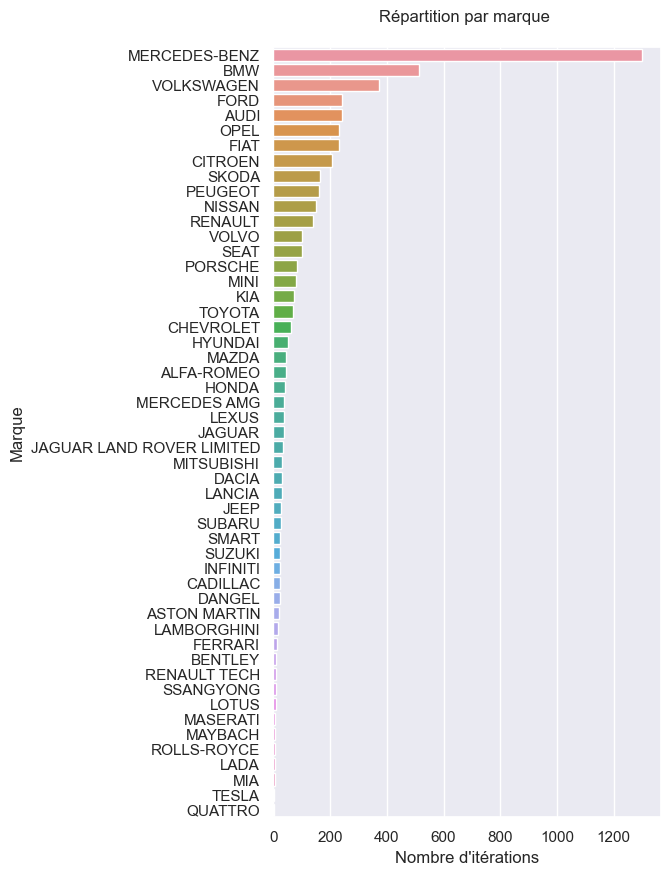

In [29]:
# Répartition des marques
ax = plt.subplots(figsize=(5,10))
plot=sns.countplot(y='Marque',data=df, order = df.Marque.value_counts().index)
plot.set_ylabel("Marque")
plot.set_xlabel("Nombre d'itérations")
plot.set(title='Répartition par marque \n');

On refait les ANOVA pour vérifier les liens avec la variable CO2 :

In [38]:

#ANOVA marques
result = statsmodels.formula.api.ols('CO2 ~ Marque', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Marque,50.0,5.653084e+06,113061.683715,72.836831,0.0
Residual,5185.0,8.048467e+06,1552.259794,NaN,NaN


In [39]:
#carburant
result = statsmodels.formula.api.ols('CO2 ~ Carburant', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Carburant,10.0,1.381820e+06,138182.022294,58.605262,4.955727e-113
Residual,5225.0,1.231973e+07,2357.843253,NaN,NaN


In [40]:
#hybride
result = statsmodels.formula.api.ols('CO2 ~ Hybride', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
Hybride,1.0,5.943198e+04,59431.983079,22.801956,0.000002
Residual,5234.0,1.364212e+07,2606.442345,NaN,NaN


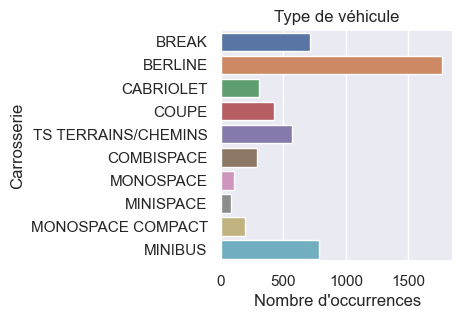

In [50]:
# Répartition des types de carrosserie

plt.subplots(figsize=(3,3))

plot_car2=sns.countplot(y=df.Carrosserie)
plot_car2.set_xlabel("Nombre d'occurrences")
plot_car2.set_ylabel('Carrosserie')
plot_car2.set(title='Type de véhicule');

La répartition des types de véhicules est plus homogène

In [42]:
#Carrosserie
result = statsmodels.formula.api.ols('CO2 ~ Carrosserie', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
boite,2.0,1.476644e+06,738321.996562,316.046489,2.630378e-130
Residual,5233.0,1.222491e+07,2336.118331,NaN,NaN


In [43]:
#gamme2
result = statsmodels.formula.api.ols('CO2 ~ gamme2', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
gamme2,5.0,2.703537e+06,540707.468979,257.12825,2.140776e-246
Residual,5230.0,1.099801e+07,2102.870721,NaN,NaN


Les liens entre la variable CO2 et les variables qualitatives sont tous significatifs

#### *Séparation des variables*

In [44]:
# On sépare les variables numériques et catégorielles
var_num = df.select_dtypes(exclude = 'object') # On récupère les variables numériques
var_cat = df.select_dtypes(include = 'object') # On récupère les variables catégorielles

# On récupère les variables cibles
target_reg = df['CO2']                         # Variable cible pour la regression
target_class = df['Cat_CO2']                   # Variable cible pour la classification

var_num = var_num.drop(['Cat_CO2', 'CO2'], axis = 1)  # Les variables cibles sont éliminées des variables numériques

In [45]:
display(var_cat.head())
display(var_num.head())

,Marque,Carburant,Hybride,Carrosserie,boite,gamme2
0,ALFA-ROMEO,ES,non,BREAK,M,MOY-SUPERIEURE
1,ALFA-ROMEO,GO,non,BERLINE,M,MOY-SUPERIEURE
2,ALFA-ROMEO,GO,non,BERLINE,M,MOY-SUPERIEURE
4,ALFA-ROMEO,GO,non,BERLINE,M,MOY-SUPERIEURE
6,ALFA-ROMEO,ES,non,BREAK,M,MOY-SUPERIEURE


,puiss_max,masse_ordma_min
0,147.0,1505
1,125.0,1565
2,100.0,1565
4,125.0,1565
6,147.0,1555


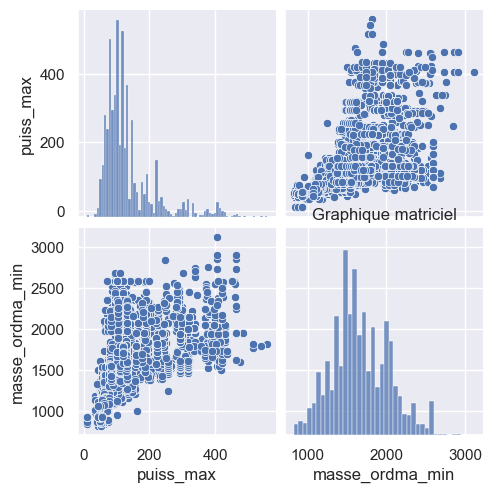

In [46]:
sns.pairplot(data = var_num,
             x_vars = var_num.columns,
             y_vars = var_num.columns)
plt.title('Graphique matriciel');

***

# **2e partie : Modélisation**

***

### *Import des librairies utiles*

In [70]:
# Les différents types de modèles de Machine Learning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

# Les fonctions de paramétrage de la modélisation
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import GridSearchCV

# Les fonctions de preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# Les fonctions statistiques
import scipy.stats as stats
from scipy.stats import anderson
from scipy.stats import jarque_bera

import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import  het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Les métriques
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate

# Les fonctions de sauvegarde et chargement de modèles
from joblib import dump, load

from sklearn.model_selection import train_test_split

## 1. Regression

### ***Déterminer les émissions de CO2 d'un véhicule mis sur le marché***

#### *Revue de variables d'intérêt*

In [71]:
# Labélisation des variables catégorielles par labelencoder:
labelencoder = LabelEncoder()
var_cat_num = var_cat.apply(labelencoder.fit_transform)

In [72]:
# Jointure var_num avec var_cat_num en un dataframe data:
data = var_num.join(var_cat_num)
data.head()

,puiss_max,masse_ordma_min,Marque,modele_dossier,Carburant,Carrosserie,boite,gamme2
0,147.0,1505,0,1,0,1,2,4
1,125.0,1565,0,1,1,0,2,4
2,100.0,1565,0,1,1,0,2,4
4,125.0,1565,0,1,1,0,2,4
6,147.0,1555,0,1,0,1,2,4


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5117 entries, 0 to 44849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   puiss_max        5117 non-null   float64
 1   masse_ordma_min  5117 non-null   int64  
 2   Marque           5117 non-null   int32  
 3   modele_dossier   5117 non-null   int32  
 4   Carburant        5117 non-null   int32  
 5   Carrosserie      5117 non-null   int32  
 6   boite            5117 non-null   int32  
 7   gamme2           5117 non-null   int32  
dtypes: float64(1), int32(6), int64(1)
memory usage: 368.9 KB


### **3.1. Premier modèle**

#### 3.1.1. Préparation du dataset  - Séparation en un jeu d'entrainement et de test - standardisation des variables numériques d'entrainement

In [74]:
# Séparation du jeu de données en un jeu d'entrainement et de test:
X_train, X_test, y_train, y_test = train_test_split(data, target_reg, test_size = 0.2, random_state = 3)

# Sélection des variables d'origine numérique de X_train et X_test (puis_max et masse_ordma_min):
X_train_num = X_train.iloc[:,0:2]
X_test_num = X_test.iloc[:,0:2]
X_train_cat = X_train.iloc[:,2:]
X_test_cat = X_test.iloc[:,2:]

# Standardisation des données numériques (X_train_num et X_test_num):
## Ajustement du StandardScaler aux données numériques d'entrainement:
scaler = StandardScaler().fit(X_train_num)

## Application de la transformation à X_train_num et X_test_num:
## Transformation des arrays en dataframe en conservant les index:
X_train_num[X_train_num.columns] = pd.DataFrame(scaler.transform(X_train_num), index = X_train_num.index)
X_test_num[X_test_num.columns] = pd.DataFrame(scaler.transform(X_test_num), index = X_test_num.index)

# Jointure des X_train_num et X_test num avec X_train_cat et X_test_cat en des jeux de données standardisés X_train_std et X_test_std:
X_train_std = X_train_num.join(X_train_cat)
X_test_std = X_test_num.join(X_test_cat)

#### 3.1.2. Création du modèle de régression, entraînement et évaluation du modèle

R2 modèle_train = 0.78
R2 obtenu par CV = 0.78
R2 modèle_test = 0.8

RMSE_train = 23.67
RMSE_test = 23.44

MAE_train: 17.74
MAE_test: 18.22

Erreur relative = 11.0 %

Intercept = 163.23


,coefficient,VIF
masse_ordma_min,25.174136,1.66
puiss_max,25.058714,1.59
Carburant,-24.893804,3.44
boite,2.572035,2.49
Carrosserie,1.912338,2.24
gamme2,-1.565118,4.89
Marque,0.186692,3.14
modele_dossier,0.041665,3.76


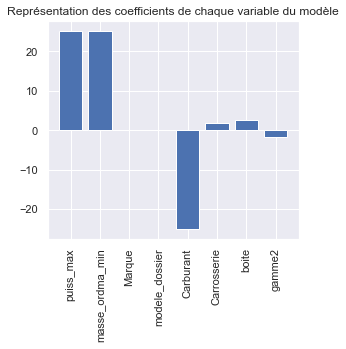

In [75]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Entraînement et prédictions:
lr.fit(X_train_std, y_train)
pred_train = lr.predict(X_train_std) # = valeurs ajustées sfm_train
pred_test = lr.predict(X_test_std) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(X_train_std, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,X_train_std,y_train, cv = 5).mean(),2))
print("R2 modèle_test =", round(lr.score(X_test_std, y_test),2))
print('\nRMSE_train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
print('RMSE_test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),2))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(X_train_std.columns, coef)
plt.xticks(X_train_std.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle');

# Affichage de l'intercept:
print('\nIntercept =', round(lr.intercept_,2))

# Tableau des coefficients et des VIF (Multicolinéarité) par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(X_train_std.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(X_train_std.values, i),2) for i in range(X_train_std.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)

In [76]:
#Analyse statsmodel
X = X_train_std
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1831.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:49:36   Log-Likelihood:                -18758.
No. Observations:                4093   AIC:                         3.753e+04
Df Residuals:                    4084   BIC:                         3.759e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             163.2265      1.481    1

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


#### 3.1.3. Interprétation

Les scores obtenus sur l'échantillon d'apprentissage, par validation croisée et sur l'échantillon de test sont corrects et ne montrent pas de sur-apprentissage.

L'erreur moyenne est d'environ 11% des rejets de CO2 moyen.

Les prédictions ne sont pas optimales mais il est possible d'affiner le modèle. La variable carburant est statistiquement significative. Cette variable a beaucoup de poids dans le modèles. On observe une différence significative entre les véhicules essence et diesel.

### **3.2. Modèle affiné - Sélection de variables:**

#### 3.2.1. Création du modèle de régression et d'un sélecteur,  entraînement et évaluation du modèle

In [77]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Création d'un sélecteur à partir de lr:
sfm = SelectFromModel(lr)

# Entrainement du selecteur et sauvegarde des colonnes de X_train_std sélectionnées par sfm dans sfm_train:
sfm_train = pd.DataFrame(sfm.fit_transform(X_train_std, y_train), index = X_train_std.index)
sfm_train = X_train_std[X_train_std.columns[sfm.get_support()]]

# Sauvegarde des colonnes de X_test_std dans sfm_test:
sfm_test = sfm.transform(X_test_std)
sfm_test = X_test_std[X_test_std.columns[sfm.get_support()]]

# Affichage des variables sélectionnées:
X_train_std.columns[sfm.get_support()]

Index(['puiss_max', 'masse_ordma_min', 'Carburant'], dtype='object')

R2 modèle_train = 0.75
R2 obtenu par CV = 0.75
R2 modèle_test = 0.77

RMSE train = 25.1967
RMSE test = 24.9537

MAE_train: 18.89
MAE_test: 19.52

Erreur relative = 12.0 %


,coefficient,VIF
masse_ordma_min,28.534226,1.31
Carburant,-25.473582,1.18
puiss_max,21.748717,1.35


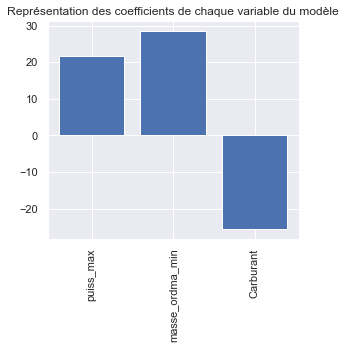

In [78]:
# Régression linéaire:
lr = LinearRegression()
lr.fit(sfm_train, y_train)
pred_train = lr.predict(sfm_train) # = valeurs ajustées sfm_train
pred_test = lr.predict(sfm_test) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(sfm_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,sfm_train,y_train).mean(),2))
print("R2 modèle_test =", round(lr.score(sfm_test, y_test),2))
print('\nRMSE train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print('RMSE test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),4))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(sfm_train.columns, coef)
plt.xticks(sfm_train.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle')
;

# Tableau des coefficients et des VIF (Multicolinéarité)par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(sfm_train.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(sfm_train.values, i),2) for i in range(sfm_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)


C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


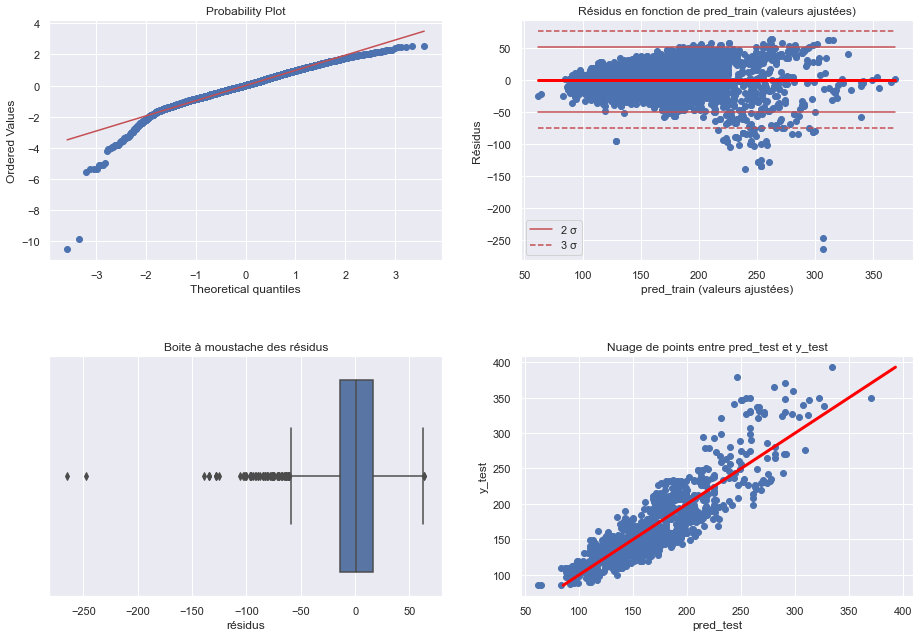

In [79]:
#Normalité des résidus:
## Calcul des résidus et résidus normalisés:
residus = pred_train - y_train 
residus_norm = (residus-residus.mean())/residus.std()
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1)) #utilisation des résidus standards pour test Jarque-Bera

# Graphes :
plt.figure(figsize = (15,10))
# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

## Graphe normalisation résidus:
plt.subplot(2,2,1)
stats.probplot(residus_norm, plot = plt)

## Graphe résidus en fonction de pred_train (valeurs ajustées):
plt.subplot(2,2,2)
plt.scatter(pred_train, residus)
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend()

## Graphe boxplot des résidus:
plt.subplot(2,2,3)
sns.boxplot(residus)
plt.title('Boite à moustache des résidus')
plt.xlabel('résidus')

## Graphe prédictions en fonction de y_test (= le long de la droite si elles sont bonnes):
plt.subplot(2,2,4)
plt.scatter(pred_test, y_test)
plt.title('Nuage de points entre pred_test et y_test')
plt.xlabel('pred_test')
plt.ylabel('y_test')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw = 3, color ='red');

3 variables sur 7 ont été sélectionnées:
   - puissance maximale
   - masse minimum
   - carburant (variable négative = les véhicules diesel rejettent moins de CO2 que les véhicules essence).

*METRICS*

Les résultats sont presque identiques au premier modèle. On ne remarque que très peu de perte d'informations (les R2 sont bons et proches) alors que ce dernier modèle possède 2 fois moins de variables explicatives. 


Le modèle parvient à apprendre sur les données d'entraînement et à généraliser sur les données de test avec une erreur de 11% en moyenne

*ANALYSE RESIDUS*

Graphe 1&2:
Les résidus ne suivent pas une loi normale. On remarque beaucoup de points extrêmes.
La présence de groupes pourrait en partie expliquer ce phénomène (1 groupe de véhicules diesel et 1 autre de véhicules essence).

Graphe 3:
On observe une relation avec un leger aspect d'"entonnoir asymétrique":
   - plus y_pred augmente, plus les résidus s'éloignent de y_pred (la dispersion augmente avec y_pred),
   - à partir d'une prévision d'environ 210 g/km de CO2, la dispersion est beaucoup plus importante surtout d'un côté:  les rejets réels des véhicules sont beaucoup plus importants que prévu.
   
Trop de points aberrants et éloignés. 
On note que 2 véhicules rejettent nettement plus de CO2 que les autres.


#### 3.2.2. Représentation graphique et conclusion

<IPython.core.display.Javascript object>


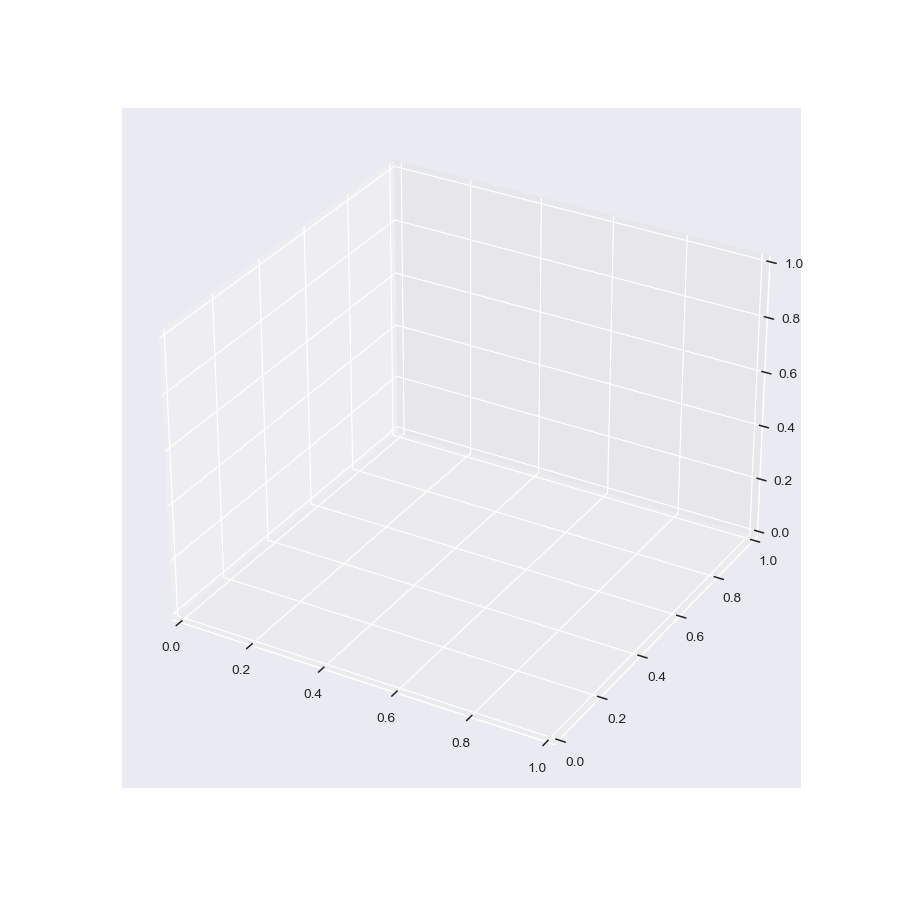

KeyError: 'puiss_max'

In [100]:
# Représentation graphique en 4D de l'influence de ces 3 variables significatives
#sur la variable explicative target (= rejet CO2):
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

z = y_train
x = sfm_train['puiss_max']
y = sfm_train['masse_ordma_min']

ax.scatter(x, y, z,  c=sfm_train['Carburant'], cmap = ('viridis'))
ax.set_xlabel('Puissance véhicules (valeurs standardisées)')
ax.set_ylabel('Masse véhicules (valeurs standardisées)')
ax.set_zlabel('CO2 (g/km)')

plt.legend(['ES','GO'])
plt.title('Représentation des rejets de CO2 des  véhicules en fonction de leurs masses, leurs poids et leurs carburants')
plt.show()

La variable carburant est statistiquement significative, c'est-à-dire qu'on observe une différence significative entre les véhicules essence et diesel. Ceci semble cohérent. L'essence et le diesel ont des propriétés différentes et les moteurs associés ont des technologies différentes.

Le graphe précédent nous montre bien l'impact de la variable carburant sur les rejets de CO2. Il semble que les rejets de CO2 sont plus dépendants de la masse du véhicule pour les véhicules diesel et de la puissance maximale pour les véhicules essence.

Il pourrait donc être judicieux de créer 2 modèles différents: un essence et un diesel pour le confirmer.

### 3.3. Impact des catégories essence (ES) et diesel (GO) sur les rejets de CO2 (= target)

<IPython.core.display.Javascript object>


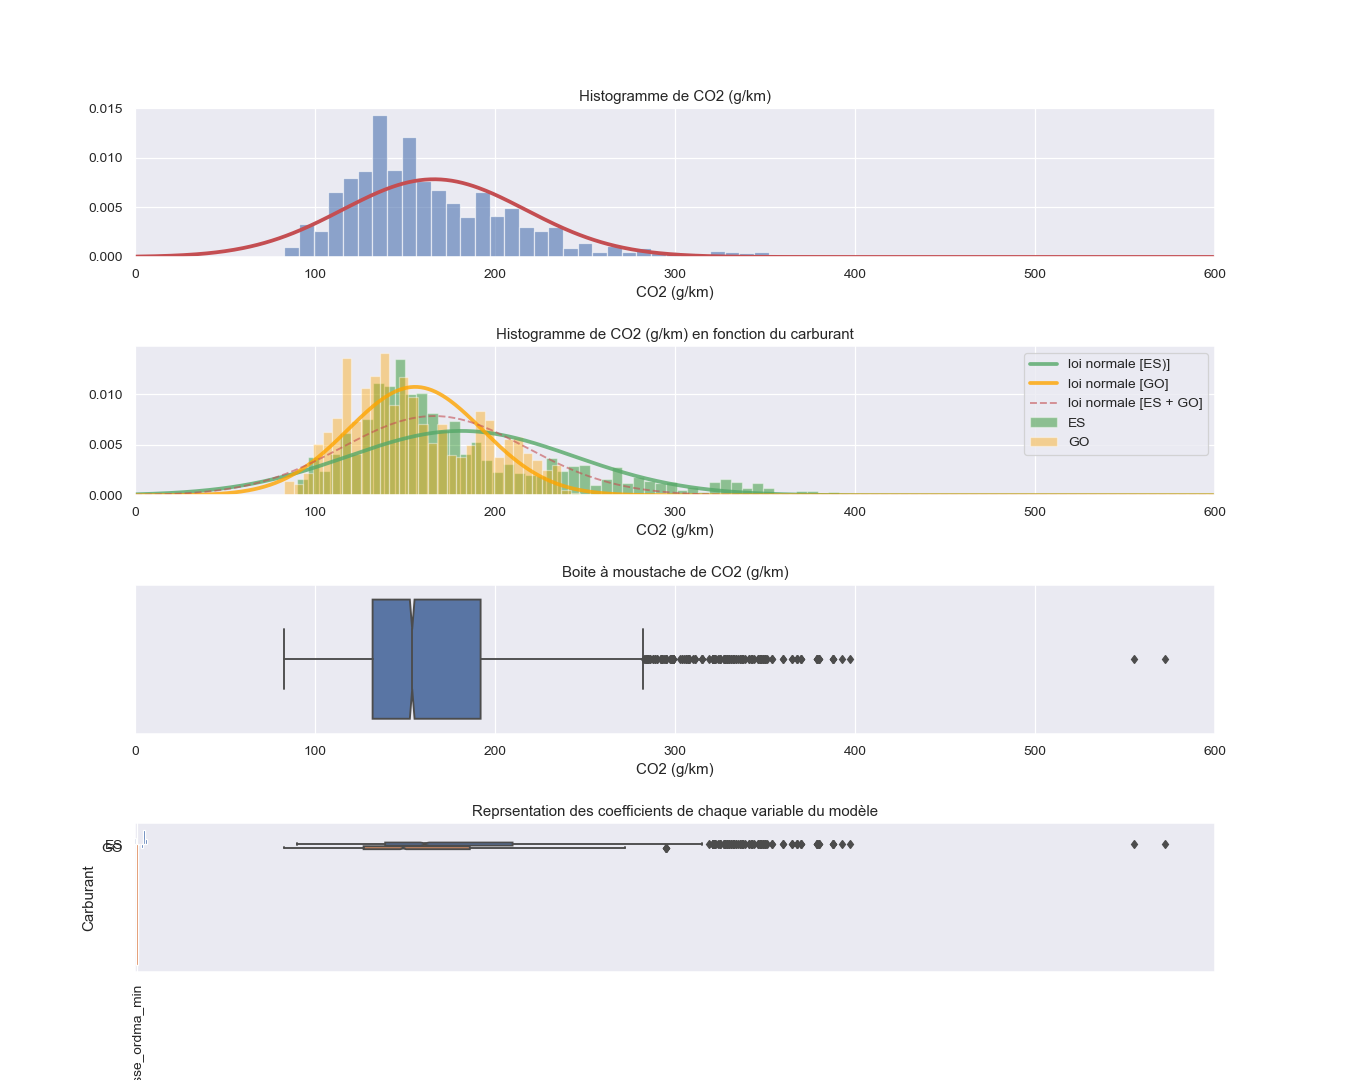

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KstestResult(statistic=1.0, pvalue=0.0)


,CO2,CO2 ES,CO2 GO
count,5117.000000,2114.000000,3003.000000
mean,166.136213,181.113529,155.592741
std,50.965544,62.727005,37.255662
min,83.000000,90.000000,83.000000
25%,132.000000,139.000000,127.000000
50%,154.000000,161.000000,149.000000
75%,192.000000,209.750000,186.000000
max,572.000000,572.000000,295.000000


In [82]:
from scipy.stats import norm
from scipy.stats import kstest

plt.figure(figsize =(15,12))

# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.6)

plt.subplot(411)

# Analyse de la distribution target (CO2):
dist = pd.DataFrame(target_reg)

# Histogramme de distribution:
plt.hist(dist, bins=60, density=True, alpha=0.6, color='b')
plt.title('Histogramme de CO2 (g/km)')
plt.xlim(0,600)
plt.xlabel('CO2 (g/km)')

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
x_axis = np.arange(0,600,1)
plt.plot(x_axis, norm.pdf(x_axis, dist.mean(), dist.std()),'r', linewidth = 3)
plt.xlim(0,600)

# Histogrammes de distribution des véhicules essence et des véhicules diesel :
plt.subplot(412)
ES = df.CO2[df['Carburant']=='ES']
GO = df.CO2[df['Carburant']=='GO']

plt.hist(ES,
         bins=80,
         density=True,
         alpha=0.4,
         color='green',
         label ='ES')

plt.hist(GO,
         bins=40,
         density=True,
         alpha=0.4,
         color='orange',
         label ='GO')

plt.title('Histogramme de CO2 (g/km) en fonction du carburant')
plt.xlabel('CO2 (g/km)')
plt.legend()

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
x_axis = np.arange(0,600,1)
plt.plot(x_axis,
         norm.pdf(x_axis, ES.mean(), ES.std()),
         'g',
         linewidth = 3,
         alpha = 0.8,
         label ='loi normale [ES)]')
plt.xlim(0,600)

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
plt.plot(x_axis,
         norm.pdf(x_axis, GO.mean(), GO.std()),
         'orange',
         linewidth = 3,
         alpha = 0.8,
         label ='loi normale [GO]')
plt.xlim(0,600)

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
plt.plot(x_axis,
         norm.pdf(x_axis, df.CO2.mean(), df.CO2.std()),
         'r--',
         linewidth = 1.5,
         alpha=0.6,
         label ='loi normale [ES + GO]')
plt.xlim(0,600)

plt.legend()

# Boite à moustache de la distribution:
plt.subplot(413)
sns.boxplot(dist.CO2, notch=True)
plt.title('Boite à moustache de CO2 (g/km)')
plt.xlabel('CO2 (g/km)')
plt.xlim(0,600)

# Boite à moustache de la distribution en fonction du carburant:
plt.subplot(414)
sns.boxplot(data = df, y = 'Carburant' , x = 'CO2', notch=True)
plt.xticks(rotation = 'vertical')
plt.title('Boite à moustache de CO2 (g/km) en fonction du type de carburant')
plt.xlabel('CO2 (g/km)')
plt.xlim(0,600)
plt.show()
;

# Test de normalité de la distribution (Kolomgorov-Smirnov):
print(stats.kstest(dist,'norm'))
describe = pd.DataFrame(dist.describe())
describe['CO2 ES'] = df.CO2[df['Carburant']=='ES'].describe()
describe['CO2 GO'] = df.CO2[df['Carburant']=='GO'].describe()
describe

La distribution CO2 (target) n'est pas normale.
On remarque une légère asymétrie voire un aspect bimodal.

Les distributions essence et diesel sont décalées. Les véhicules diesel semblent consommer moins que les véhicules essence. Les véhicules essence ont beaucoup de points extrêmes.

#### **3.3.1. Analyse véhicules Diesel uniquement**

##### 3.3.1.1. Création du dataset regroupant tous les véhicules diesel

In [84]:
# Création du Dataset des véhicules diesel uniquement dataGO:
dataGO = data.join(target_reg)
dataGO = dataGO[(dataGO['Carburant']==1)]

# Suppression de la variable 'Carburant':
dataGO = dataGO.drop('Carburant', axis = 1)

dataGO.describe()

,puiss_max,masse_ordma_min,Marque,modele_dossier,Carrosserie,boite,gamme2,CO2
count,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000,3003.000000
mean,111.763037,1761.517483,25.389610,225.184149,3.544456,1.177822,2.979354,155.592741
std,36.392200,338.022943,14.096013,129.787107,3.121395,0.979307,1.198589,37.255662
min,40.000000,845.000000,0.000000,1.000000,0.000000,0.000000,0.000000,83.000000
25%,84.000000,1505.000000,12.000000,105.000000,0.000000,0.000000,2.000000,127.000000
50%,103.000000,1700.000000,29.000000,233.000000,3.000000,2.000000,3.000000,149.000000
75%,125.000000,2015.000000,33.500000,350.000000,5.000000,2.000000,4.000000,186.000000
max,281.000000,2680.000000,48.000000,427.000000,9.000000,2.000000,5.000000,295.000000


##### 3.3.1.2 Préparation du dataset  - séparation en un jeu d'entrainement et de test - standardisation des variables numériques d'entrainement

In [85]:
# Séparation de la cible du jeu de données:
targetGO = dataGO.CO2
dataGO1 = dataGO.drop('CO2', axis = 1)

In [87]:
# Séparation du jeu de données en un jeu d'entrainement et de test:
X_train, X_test, y_train, y_test = train_test_split(dataGO1, targetGO, test_size = 0.2, random_state =3)

# Sélection des variables d'origine numérique de X_train et X_test (puis_max et masse_ordma_min):
X_train_num = X_train.iloc[:,0:2]
X_test_num = X_test.iloc[:,0:2]
X_train_cat = X_train.iloc[:,2:]
X_test_cat = X_test.iloc[:,2:]

# Standardisation des données numériques (X_train_num et X_test_num):
## Ajustement du StandardScaler aux données numériques d'entrainement:
scaler = StandardScaler().fit(X_train_num)

## Application de la transformation à X_train_num et X_test_num:
## Transformation des arrays en dataframe en conservant les index:
X_train_num[X_train_num.columns] = pd.DataFrame(scaler.transform(X_train_num), index = X_train_num.index)
X_test_num[X_test_num.columns] = pd.DataFrame(scaler.transform(X_test_num), index = X_test_num.index)

# Jointure des X_train_num et X_test num avec X_train_cat et X_test_cat en des jeux de données standardisés X_train_std et X_test_std:
X_train_std = X_train_num.join(X_train_cat)
X_test_std = X_test_num.join(X_test_cat)

In [89]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Entraînement et prédictions:
lr.fit(X_train_std, y_train)
pred_train = lr.predict(X_train_std) # = valeurs ajustées sfm_train
pred_test = lr.predict(X_test_std) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(X_train_std, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,X_train_std,y_train, cv = 5).mean(),2))
print("R2 modèle_test =", round(lr.score(X_test_std, y_test),2))
print('\nRMSE_train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),2))
print('RMSE_test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),2))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(X_train_std.columns, coef)
plt.xticks(X_train_std.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle')
;

# Affichage de l'intercept:
print('\nIntercept =', round(lr.intercept_,2))

# Tableau des coefficients et des VIF (Multicolinéarité)par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(X_train_std.columns))
# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(X_train_std.values, i),2) for i in range(X_train_std.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)

R2 modèle_train = 0.82
R2 obtenu par CV = 0.81
R2 modèle_test = 0.81

RMSE_train = 15.91
RMSE_test = 16.5

MAE_train: 12.82
MAE_test: 13.13

Erreur relative = 8.0 %

Intercept = 146.95


,coefficient,VIF
masse_ordma_min,30.026013,1.39
boite,-3.848911,2.71
puiss_max,-1.536388,1.42
gamme2,-1.325057,5.41
Carrosserie,1.142837,2.51
Marque,0.167662,3.44
modele_dossier,0.036843,4.36


In [90]:
#Analyse statsmodel:
X = X_train_std
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1523.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:09:46   Log-Likelihood:                -10055.
No. Observations:                2402   AIC:                         2.013e+04
Df Residuals:                    2394   BIC:                         2.017e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             146.9504      1.297    1

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Les scores du modèle Diesel sont meilleurs que les scores des modèles précedents (regroupant tous les véhicules). Pas de surajustement.

Les MAE sont plus faibles.

Le modèle parvient à apprendre sur les données d'entraînement et à généraliser sur les données de test avec une erreur de 8% en moyenne

Il est possible d'affiner ce modèle en diminuant le nombre de variables

#### 3.3.2. Modèle Diesel affiné - Sélection de variables

##### 3.3.2.1. Création du modèle de régression et d'un sélecteur,  entraînement et évaluation du modèle

In [91]:
# Instanciation d'un modèle de régression linéaire
lr = LinearRegression()

# Création d'un sélecteur à partir de lr:
sfm = SelectFromModel(lr)

# Entrainement du selecteur et sauvegarde des colonnes de X_train_std sélectionnées par sfm dans sfm_train:
sfm_train = pd.DataFrame(sfm.fit_transform(X_train_std, y_train), index = X_train_std.index)
sfm_train = X_train_std[X_train_std.columns[sfm.get_support()]]

# Sauvegarde des colonnes de X_test_std dans sfm_test:
sfm_test = sfm.transform(X_test_std)
sfm_test = X_test_std[X_test_std.columns[sfm.get_support()]]

# Affichage des variables sélectionnées:
X_train_std.columns[sfm.get_support()]

Index(['masse_ordma_min'], dtype='object')

In [92]:
# Régression linéaire:
lr = LinearRegression()
lr.fit(sfm_train, y_train)
pred_train = lr.predict(sfm_train) # = valeurs ajustées sfm_train
pred_test = lr.predict(sfm_test) # = valeurs ajustées sfm_test

# Affichage des metrics:
print("R2 modèle_train =", round(lr.score(sfm_train, y_train),2))
print("R2 obtenu par CV =", round(cross_val_score(lr,sfm_train,y_train).mean(),2))
print("R2 modèle_test =", round(lr.score(sfm_test, y_test),2))
print('\nRMSE train =', round(np.sqrt(mean_squared_error(y_train, pred_train)),4))
print('RMSE test =', round(np.sqrt(mean_squared_error(y_test, pred_test)),4))
print("\nMAE_train:", round(mean_absolute_error(y_train, pred_train),2))
print("MAE_test:", round(mean_absolute_error(y_test, pred_test),2))
print("\nErreur relative =", round(mean_absolute_error(y_test, pred_test) / target_reg.mean(),2)*100, '%')

# Représentation des coefficients:
coef = lr.coef_
plt.bar(sfm_train.columns, coef)
plt.xticks(sfm_train.columns, rotation = 90)
plt.title('Représentation des coefficients de chaque variable du modèle')
;

# Tableau des coefficients et des VIF (Multicolinéarité)par variables:
table = pd.DataFrame({'coefficient': list(lr.coef_)}, index=list(sfm_train.columns))

# Calcul des vif et stockage dans la colonne 'VIF' de table:
table['VIF'] = [round(variance_inflation_factor(sfm_train.values, i),2) for i in range(sfm_train.shape[1])]

# Classement descendant des coefficients en valeur absolue
table.sort_values(by = 'coefficient', ascending = False, key = abs)


R2 modèle_train = 0.78
R2 obtenu par CV = 0.78
R2 modèle_test = 0.77

RMSE train = 17.4729
RMSE test = 18.0142

MAE_train: 14.11
MAE_test: 14.47

Erreur relative = 9.0 %


ValueError: zero-size array to reduction operation maximum which has no identity

In [93]:
#Analyse statsmodel:
X = sfm_train
X = sm.add_constant(X) #ajout d'une constante
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     8455.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        15:28:44   Log-Likelihood:                -10280.
No. Observations:                2402   AIC:                         2.056e+04
Df Residuals:                    2400   BIC:                         2.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             154.9883      0.357    4

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<IPython.core.display.Javascript object>


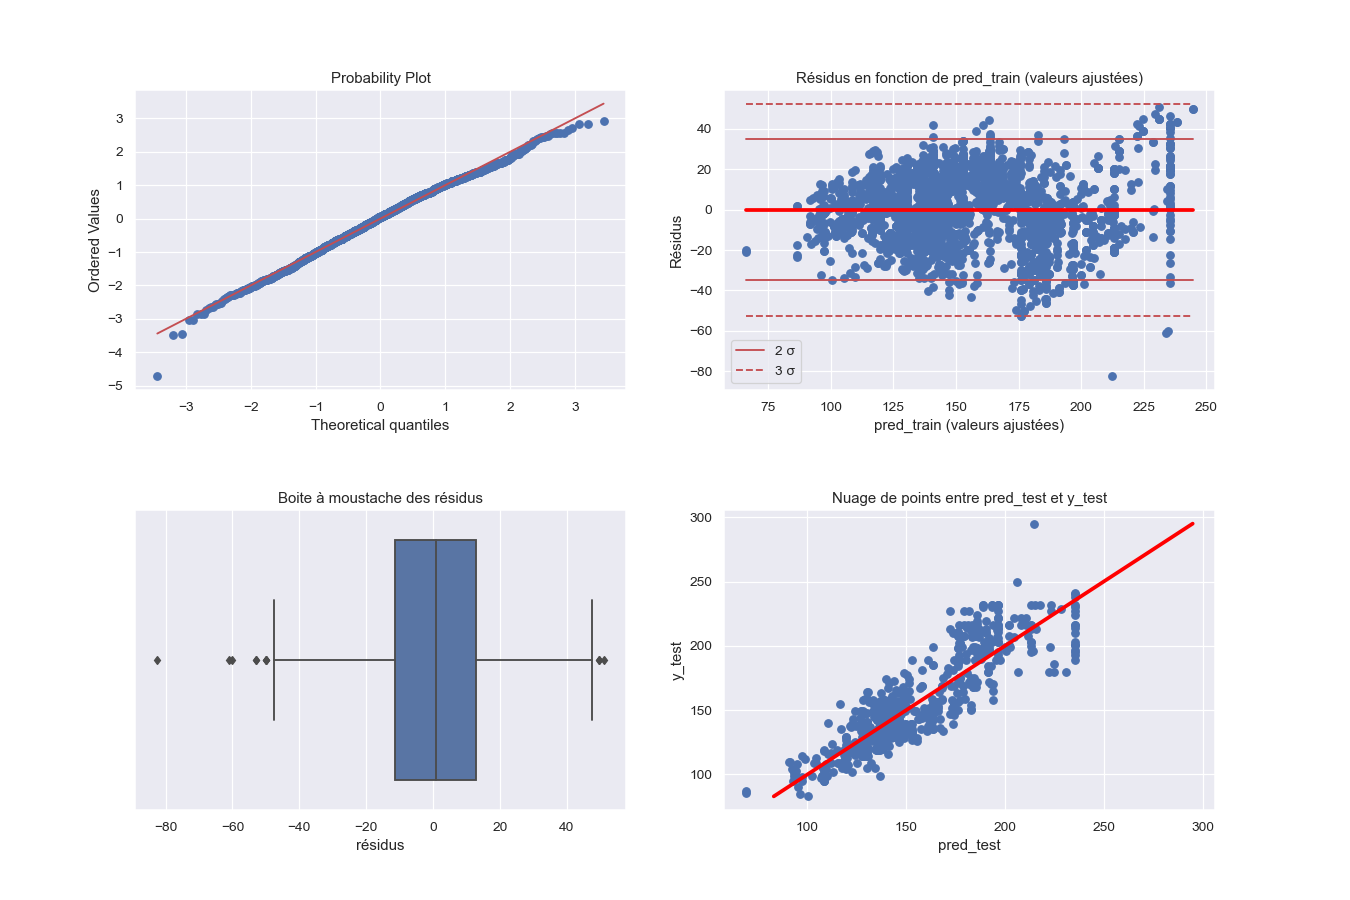

C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [94]:
#Normalité des résidus:
## Calcul des résidus et résidus normalisés:
residus = pred_train - y_train 
residus_norm = (residus-residus.mean())/residus.std()
residus_std = residus/np.sqrt(sum(residus**2)/(len(residus)-1)) #utilisation des résidus standards pour test Jarque-Bera

# Graphes :
plt.figure(figsize = (15,10))
# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.4)

## Graphe normalisation résidus:
plt.subplot(2,2,1)
stats.probplot(residus_norm, plot = plt)

## Graphe résidus en fonction de pred_train (valeurs ajustées):
plt.subplot(2,2,2)
plt.scatter(pred_train, residus)
plt.plot((pred_train.min(), pred_train.max()), (0, 0), lw=3, color='red')
plt.plot((pred_train.min(), pred_train.max()), (2*residus.std(), 2*residus.std()), 'r-', lw=1.5, label = '2 σ') 
plt.plot((pred_train.min(), pred_train.max()), (3*residus.std(), 3*residus.std()), 'r--', lw=1.5, label = '3 σ')
plt.plot((pred_train.min(), pred_train.max()), (-2*residus.std(), -2*residus.std()), 'r-',lw=1.5)
plt.plot((pred_train.min(), pred_train.max()), (-3*residus.std(), -3*residus.std()), 'r--', lw=1.5)
plt.title('Résidus en fonction de pred_train (valeurs ajustées)')
plt.xlabel('pred_train (valeurs ajustées)')
plt.ylabel('Résidus')
plt.legend()

## Graphe boxplot des résidus:
plt.subplot(2,2,3)
sns.boxplot(residus)
plt.title('Boite à moustache des résidus')
plt.xlabel('résidus')

## Graphe prédictions en fonction de y_test (= le long de la droite si elles sont bonnes):
plt.subplot(2,2,4)
plt.scatter(pred_test, y_test)
plt.title('Nuage de points entre pred_test et y_test')
plt.xlabel('pred_test')
plt.ylabel('y_test')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), lw = 3, color ='red');

L'ensemble des metrics du modèle affiné Diesel est légèrement moins bons que celui du modèle Diesel précedent, mais le nombre de variables a été divisé par 3. Pas de surajustement.

Par rapport au modèle Diesel simple, on constate, pour le modèle affiné Diesel:
   - Diminution des R2 de 2%
   - Augmentation des RMSE de moins 1 g/km
   - Augmentation des MAE de moins 0.8 g/km
   - Augmentation de l'erreur relative de 1%

Les MAE sont plus faibles.

Le modèle parvient à apprendre sur les données d'entraînement et à généraliser sur les données de test avec une erreur de 9% en moyenne

<IPython.core.display.Javascript object>


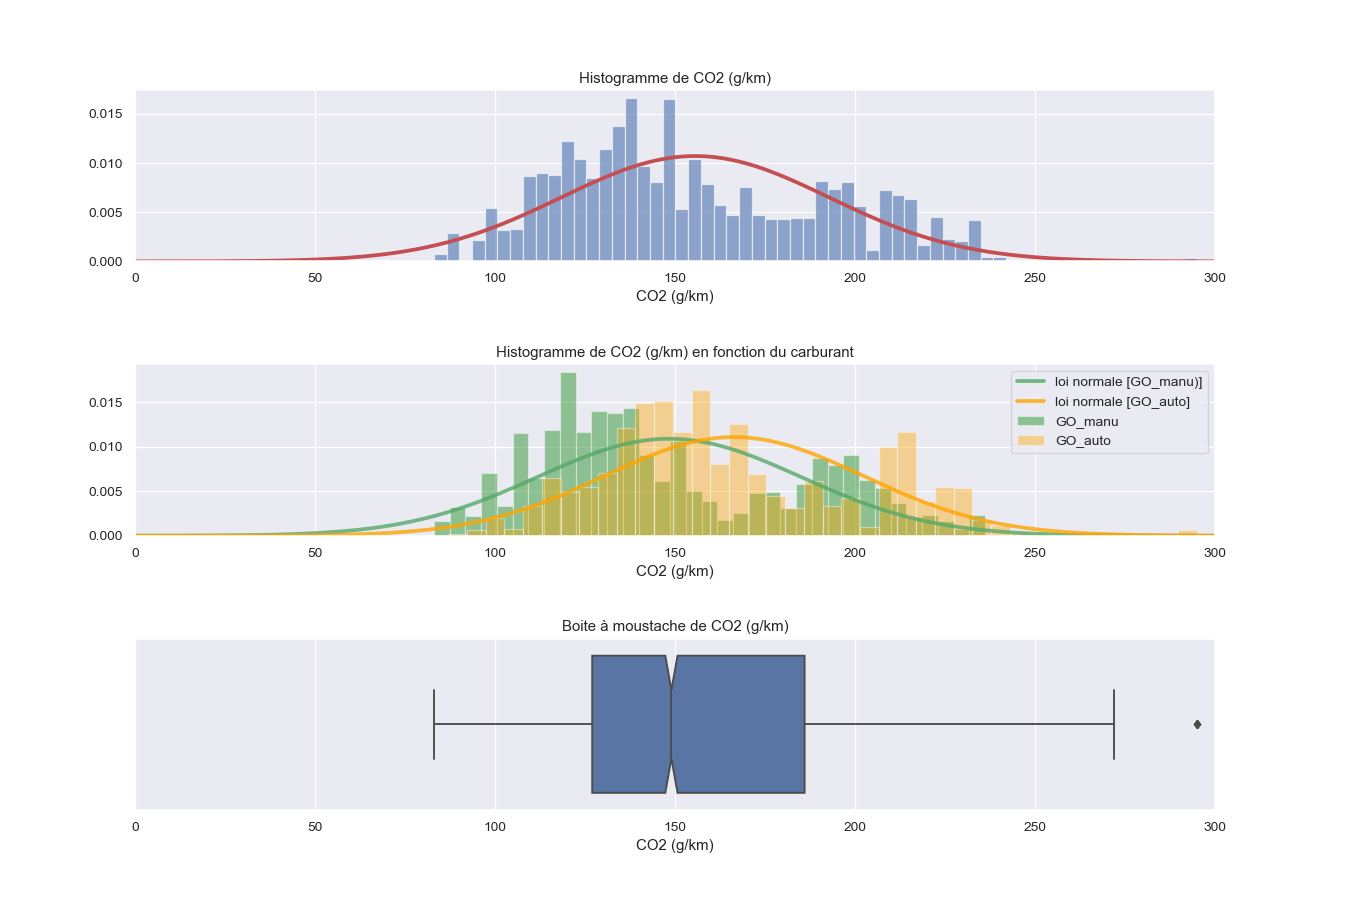

KstestResult(statistic=1.0, pvalue=0.0)


C:\Users\gilles.ngamenye\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,CO2,GO_manu,GO_auto
count,3003.000000,1754.000000,1220.000000
mean,155.592741,148.408780,166.371311
std,37.255662,36.562225,35.949157
min,83.000000,83.000000,87.000000
25%,127.000000,119.000000,140.000000
50%,149.000000,139.000000,159.000000
75%,186.000000,182.750000,194.250000
max,295.000000,258.000000,295.000000


In [96]:
plt.figure(figsize =(15,10))

# Espacement des graphes:
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.2,
                    hspace=0.6)

plt.subplot(311)

# Analyse de la distribution des rejets des véhicules diesel (CO2 (g/km)):
dist = pd.DataFrame(df.CO2[(df['Carburant']=='GO')])

# Histogramme de distribution:
plt.hist(dist, bins=60, density=True, alpha=0.6, color='b')
plt.title('Histogramme de CO2 (g/km)')
plt.xlim(0,300)
plt.xlabel('CO2 (g/km)')

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
x_axis = np.arange(0,600,1)
plt.plot(x_axis, norm.pdf(x_axis, dist.mean(), dist.std()),'r', linewidth = 3)
plt.xlim(0,300)

# Histogrammes de distribution des véhicules diesel en boîte auto et boîte manuelle:
plt.subplot(312)
GO_manu = df.CO2[(df['Carburant']=='GO')&(df['boite']=='M')]
GO_auto = df.CO2[(df['Carburant']=='GO')&(df['boite']=='A')]

plt.hist(GO_manu,
         bins=40,
         density=True,
         alpha=0.4,
         color='green',
         label ='GO_manu')

plt.hist(GO_auto,
         bins=40,
         density=True,
         alpha=0.4,
         color='orange',
         label ='GO_auto')

plt.title('Histogramme de CO2 (g/km) en fonction du carburant')
plt.xlabel('CO2 (g/km)')
plt.legend()

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
x_axis = np.arange(0,600,1)
plt.plot(x_axis,
         norm.pdf(x_axis, GO_manu.mean(), GO_manu.std()),
         'g',
         linewidth = 3,
         alpha = 0.8,
         label ='loi normale [GO_manu)]')
plt.xlim(0,300)

# Représentation de la loi normale avec la moyenne et l'écart-type de la distribution:
plt.plot(x_axis,
         norm.pdf(x_axis, GO_auto.mean(), GO_auto.std()),
         'orange',
         linewidth = 3,
         alpha = 0.8,
         label ='loi normale [GO_auto]')
plt.xlim(0,300)

plt.legend()

# Boite à moustache de la distribution:
plt.subplot(313)
sns.boxplot(dist.CO2, notch=True)
plt.title('Boite à moustache de CO2 (g/km)')
plt.xlabel('CO2 (g/km)')
plt.xlim(0,300)


# Test de normalité de la distribution (Kolomgorov-Smirnov):
print(stats.kstest(dist,'norm'))
describe = pd.DataFrame(dist.describe())
describe['GO_manu'] = GO_manu.describe()
describe['GO_auto'] = GO_auto.describe()
describe

##### 3.3.2.2. Interprétation

## 2. Classification multiple

### Déterminer la classe du véhicule selon les normes européennes

Afin d'effectuer des classifications multiples, nous avons sélectionné les 3 classifieurs suivants :
- SVC
- KNN
- Random Forest 

De prime abord, toutes les variables qualitatives ne seraient pas utiles dans la modélisation. Les variables qui nous semblent avoir un impact sur les émissions de CO2 sont : 
- le type de boîte de vitesse
- le carburant

#### *Revue de variables d'intérêt*

In [816]:
# Les variables catégorielles sont transformées en indicatrices
var_cat_ind = pd.get_dummies(var_cat)

# On récupère les variables explicatives
feats = var_num.join(var_cat_ind)
feats.head()

,puiss_max,masse_ordma_min,Marque_ALFA-ROMEO,Marque_ASTON MARTIN,Marque_AUDI,Marque_BENTLEY,Marque_BMW,Marque_CADILLAC,Marque_CHEVROLET,Marque_CITROEN,...,Carrosserie_TS TERRAINS/CHEMINS,boite_A,boite_Autres,boite_M,gamme2_ECONOMIQUE,gamme2_INFERIEURE,gamme2_LUXE,gamme2_MOY-INFERIEURE,gamme2_MOY-SUPERIEURE,gamme2_SUPERIEURE
0,147.0,1505,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,125.0,1565,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,100.0,1565,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,125.0,1565,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,147.0,1555,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [817]:
# Distribution de la variable cible de classification
target_class.value_counts(normalize = True)
# On a une distribution légèrement déséquilibrée

E    0.230408
D    0.207934
C    0.200313
F    0.139535
B    0.124878
G    0.060973
A    0.035959
Name: Cat_CO2, dtype: float64

#### *Séparation en données d'entraînement et de test*

In [818]:
# Pour rappel, le dataset feats regroupe les variables numériques et catégorielles
X_train, X_test, y_train, y_test = train_test_split(feats, target_class, test_size = 0.25, random_state = 225)

In [819]:
# Les variables numériques doivent être standardisées
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### *Classifieur 1 : SVC*

In [820]:
# Instanciation du classifieur
clf_svc2 = SVC(gamma = 'scale')        

clf_svc2.fit(X_train, y_train)         # Entraînement du classifieur

y_pred_svc2 = clf_svc2.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc2, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

Classes prédites SVC,A,B,C,D,E,F,G
Classes réelles,,,,,,,
A,9,19,17,2,0,0,0
B,10,61,57,22,2,0,0
C,3,37,132,73,13,0,0
D,2,19,62,148,42,0,0
E,0,7,21,75,161,29,1
F,0,1,3,8,49,118,6
G,0,0,0,1,21,13,36


In [821]:
# Accuracy de clf_svc2
acc_svc = accuracy_score(y_test, y_pred_svc2)

# Affichage des métriques
print("L'accuracy de clf_svc2 est de", acc_svc)

# Enregistrement du modèle
dump(clf_svc2, 'clf_svc2.joblib')

L'accuracy de clf_svc2 est de 0.51953125


['clf_svc2.joblib']

#### *Optimisation du classifieur SVC - Choix des hyperparamètres*

Tout comme précédemment, les hyperparamètres évalués sont :
- C : doit être strictement positif
- kernel
- gamma :'scale' 'auto' ou des nombres décimaux

In [822]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 

parametres= {
        'C' :[1,50,100,200],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' :[0.05,0.07,0.1,0.2,0.5,1]
}

# On applique la fonction gridsearch au modèle SVC
grid_svc2=GridSearchCV(clf_svc2,parametres)

# On entraîne grid_svc sur l'ensemble d'entraînement
grille=grid_svc2.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le SVC sont ',grille.best_params_)

KeyboardInterrupt: 

In [ ]:
# On refait les prédictions de classe avec les paramètres optimisés
y_pred_svc2_grid =grid_svc2.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_svc2_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites SVC'])

In [ ]:
# Accuracy de clf_svc2 optimisé
acc_svc2_grid = accuracy_score(y_test, y_pred_svc2_grid)

# Affichage des métriques
print("L'accuracy de clf_svc2_grid est de", acc_svc2_grid)

print('\n', classification_report(y_test, y_pred_svc2_grid))

### *Classifieur 2 : KNN*

In [ ]:
# Instanciation du classifieur
clf_knn2 = KNeighborsClassifier()       

clf_knn2.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_knn2 = clf_knn2.predict(X_test)  # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn2, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])


In [ ]:
# Accuracy de clf_knn2
acc_knn = accuracy_score(y_test, y_pred_knn2)

# Affichage des métriques
print("L'accuracy de clf_knn2 est de", acc_knn)

# Enregistrement du modèle
dump(clf_knn2, 'clf_knn2.joblib')

#### *Optimisation du classifieur KNN - Choix des hyperparamètres*

Comme précédemment, les hyperparamètres sélectionnés sont:
- n_neighbors
- leaf_size
- p
- metric afin de déterminer sur quelle etendue on peut faire jouer les hyper paramètres

In [ ]:
# Création d'un dictionnaire de parametres contenant les valeurs possibles prises pour les paramètres 

parametres_knn= {
    'leaf_size'  :list(range(1,5)),
    'n_neighbors': list(range(1,10)),
    'p':[1,2],
    'metric': ['minkowski','manhattan','chebyshev']
}

#on applique la fonction gridsearch au modèle knn
grid_knn2 = GridSearchCV(clf_knn2,parametres_knn)

#on entraîne grid_knn sur l'ensemble d'entraînement
grille_knn2 = grid_knn2.fit(X_train, y_train)

# On affiche les meilleurs paramètres de la grille 
print('les meilleurs paramètres pour le KNN sont ',grille_knn2.best_params_)

In [ ]:
# On refait les prédictions de classe avec les paramètres optimisés
y_pred_knn2_grid = grid_knn2.predict(X_test) # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_knn2_grid, rownames = ['Classes réelles'], colnames = ['Classes prédites KNN'])

In [ ]:
# Accuracy de clf_knn2 optimisé
acc_knn2_grid = accuracy_score(y_test, y_pred_knn2_grid)

# Affichage des métriques
print("L'accuracy de clf_knn2 est de", acc_knn2_grid)

# Enregistrement du modèle
dump(grid_knn2, 'clf_knn2_grid.joblib')

print('\n', classification_report(y_test, y_pred_knn2))

### *Classifieur 3 : Random Forest*

In [ ]:
# Instanciation du classifieur
clf_rf2 = RandomForestClassifier()     

clf_rf2.fit(X_train, y_train)          # Entraînement du classifieur

y_pred_rf2 = clf_rf2.predict(X_test)   # Prédictions du classifieur

# Matrice de confusion
pd.crosstab(y_test, y_pred_rf2, rownames = ['Classes réelles'], colnames = ['Classes prédites RF'])

In [ ]:
# Accuracy de clf_rf2
acc_rf = accuracy_score(y_test, y_pred_rf2)

# Affichage des métriques
print("L'accuracy de clf_rf2 est de", acc_rf)

# Enregistrement du modèle
dump(clf_rf2, 'clf_rf2.joblib')

print('\n', classification_report(y_test, y_pred_rf2))

### Comparaison des classifieurs : Voting Classifier

In [ ]:
# Instanciation du classifieur
clf_vc = VotingClassifier([('rf', clf_rf), ('svc', clf_svc), ('knn', clf_knn)], voting = 'hard')

# Création du cross-validator
cv3 = KFold(n_splits = 3) # Question : comment choisir les autres paramètres du CV? Comment définir le nombre optimal de splits?

# Validation croisée et évaluation des classifieurs
for clf, label in zip([clf_rf, clf_svc, clf_knn, clf_vc], ['Random Forest', 'SVC', 'KNN', 'Voting Classifier']):
    scores = cross_validate(clf, var_num, target, cv=cv3, scoring=['accuracy','f1_weighted'])
    print("[%s]: \n Accuracy: %0.2f (+/- %0.2f)" % (label, scores['test_accuracy'].mean(), scores['test_accuracy'].std()),
          "F1 score: %0.2f (+/- %0.2f)" % (scores['test_f1_weighted'].mean(), scores['test_f1_weighted'].std()))

Suite au Voting Classifier, on constate que le modèle Random Forest (clf_rf) est celui qui a les meilleurs scores

In [ ]:
# Enregistrement du modèle
dump(clf_vc, 'clf_vc.joblib')